# Project 3 - Application for Public Health Service

The public health agency 'Santé publique France' has launched a call for projects to find innovative ideas for applications related to food. You want to participate and propose an application idea.

Excerpt from the call for projects:

The Open Food Fact data set is available on the official website. The variables are defined at this address.

The fields are separated into four sections:

- General information about the product sheet: name, modification date, etc.
- A set of tags: product category, location, origin, etc.
- The ingredients composing the products and their possible additives.
- Nutritional information: quantity in grams of a nutrient per 100 grams of the product.

Your mission:

After reading the call for projects, here are the different steps you have identified:

- Process the data set to identify relevant variables for future processing. Automate these treatments to avoid repeating these operations.

 The program must work if the database is slightly modified (for example, by adding entries).
 

- Throughout the analysis, produce visualizations to better understand the data. Perform a univariate analysis for each interesting variable to synthesize its behavior.

 The call for project specifies that the analysis must be easy to understand for a novice audience. So be attentive to readability: text size, choice of colors, sufficient clarity, and vary the graphics (box plots, histograms, pie charts, scatter plots...) to best illustrate your point.
 

- Confirm or refute hypotheses using multivariate analysis. Perform appropriate statistical tests to verify the significance of the results.


- Develop an application idea. Identify arguments justifying the feasibility (or not) of the application based on Open Food Facts data.


- Write an exploration report and pitch your idea during the project presentation.

In [1]:
%%time

import pandas as pd
from dask import dataframe as dd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from math import *
from statistics import mode
import gc
import time

from sklearn.model_selection import train_test_split

# machine learning
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn import linear_model
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.inspection import permutation_importance

# evaluation
from sklearn.metrics import classification_report, confusion_matrix

print('Setup Completed')

Setup Completed
Wall time: 4.86 s


In [2]:
time1 = time.time()

# Load data

In [3]:
%%time
path='./dataset/en_openfoodfacts_products.csv'
dataset_openfood = pd.read_csv(path, sep='\t', low_memory=False, index_col="code")
dataset_openfood = dataset_openfood[~dataset_openfood["pnns_groups_2"].isnull()]
dataset_openfood.shape

Wall time: 1min 7s


(1790827, 185)

In [4]:
#for i in range(5):
#   print(next(dataset_openfood))
dataset_openfood.head(10)

,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,abbreviated_product_name,generic_name,quantity,...,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
code,,,,,,,,,,,,,,,,,,,,,
0000000000017,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1529059080,2018-06-15T10:38:00Z,1561463718,2019-06-25T11:55:18Z,Vitória crackers,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0000000000031,http://world-en.openfoodfacts.org/product/0000...,isagoofy,1539464774,2018-10-13T21:06:14Z,1539464817,2018-10-13T21:06:57Z,Cacao,NaN,NaN,130 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
000000000003327986,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1574175736,2019-11-19T15:02:16Z,1574175737,2019-11-19T15:02:17Z,Filetes de pollo empanado,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
000000000004622327,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1619501895,2021-04-27T05:38:15Z,1619501897,2021-04-27T05:38:17Z,Hamburguesas de ternera 100%,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0000000000100,http://world-en.openfoodfacts.org/product/0000...,del51,1444572561,2015-10-11T14:09:21Z,1444659212,2015-10-12T14:13:32Z,moutarde au moût de raisin,NaN,NaN,100g,...,NaN,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00000000001111111111,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1560020173,2019-06-08T18:56:13Z,1560020173,2019-06-08T18:56:13Z,Sfiudwx,NaN,NaN,dgesc,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0000000000123,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1535737982,2018-08-31T17:53:02Z,1535737986,2018-08-31T17:53:06Z,Sauce Sweety chili 0%,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0000000000178,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1542456332,2018-11-17T12:05:32Z,1542456333,2018-11-17T12:05:33Z,Mini coco,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0000000000208,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1544207680,2018-12-07T18:34:40Z,1544207683,2018-12-07T18:34:43Z,Pistou d'ail des ours,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
%%time
dataset_openfood.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 1790827 entries, 0000000000017 to 999999999999999
Data columns (total 185 columns):
 #   Column                                      Non-Null Count    Dtype  
---  ------                                      --------------    -----  
 0   url                                         1790827 non-null  object 
 1   creator                                     1790823 non-null  object 
 2   created_t                                   1790827 non-null  int64  
 3   created_datetime                            1790827 non-null  object 
 4   last_modified_t                             1790827 non-null  int64  
 5   last_modified_datetime                      1790827 non-null  object 
 6   product_name                                1713287 non-null  object 
 7   abbreviated_product_name                    4082 non-null     object 
 8   generic_name                                114527 non-null   object 
 9   quantity                                 

In [6]:
dataset_openfood.describe()

,created_t,last_modified_t,cities,allergens_en,serving_quantity,no_nutriments,additives_n,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_that_may_be_from_palm_oil_n,...,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
count,1.790827e+06,1.790827e+06,0.0,0.0,4.679620e+05,0.0,691887.000000,691887.000000,0.0,691887.000000,...,11665.000000,666527.000000,9.000000,4.000000,1.0,43.000000,1712.000000,32.000000,46.000000,20.000000
mean,1.552603e+09,1.587804e+09,NaN,NaN,2.374371e+16,NaN,2.042939,0.020532,NaN,0.069049,...,620.707813,9.169807,12.777778,34.175000,9.1,1.530898,0.068921,3.583437,0.025010,0.038885
std,5.052889e+07,2.899034e+07,NaN,NaN,1.624247e+19,NaN,2.915449,0.143625,NaN,0.300846,...,6134.194064,8.875538,10.580380,15.620153,NaN,9.457766,1.826776,1.461794,0.026610,0.125679
min,1.328021e+09,1.333873e+09,NaN,NaN,0.000000e+00,NaN,0.000000,0.000000,NaN,0.000000,...,0.049000,-15.000000,-3.000000,14.000000,9.1,0.000000,0.000000,0.400000,0.001350,0.004000
25%,1.520096e+09,1.578658e+09,NaN,NaN,2.800000e+01,NaN,0.000000,0.000000,NaN,0.000000,...,111.000000,2.000000,3.000000,26.000000,9.1,0.047500,0.000008,2.775000,0.007525,0.007000
50%,1.563900e+09,1.587674e+09,NaN,NaN,5.000000e+01,NaN,1.000000,0.000000,NaN,0.000000,...,332.940000,10.000000,13.000000,37.000000,9.1,0.069000,0.000023,3.950000,0.020000,0.008500
75%,1.587675e+09,1.610997e+09,NaN,NaN,1.130000e+02,NaN,3.000000,0.000000,NaN,0.000000,...,614.200000,16.000000,22.000000,45.175000,9.1,0.104000,0.000096,4.000000,0.027200,0.011250
max,1.621212e+09,1.621212e+09,NaN,NaN,1.111111e+22,NaN,49.000000,3.000000,NaN,6.000000,...,656298.600000,40.000000,25.000000,48.700000,9.1,62.100000,54.000000,7.300000,0.150000,0.572000


#### remove duplicated values

In [7]:
dataset_openfood[dataset_openfood.index.duplicated()]

,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,abbreviated_product_name,generic_name,quantity,...,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
code,,,,,,,,,,,,,,,,,,,,,
30383354190402,http://world-en.openfoodfacts.org/product/3038...,openfoodfacts-contributors,1608035756,2020-12-15T12:35:56Z,1610702583,2021-01-15T09:23:03Z,basilic,NaN,NaN,210 g,...,NaN,-3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3560070278831,http://world-en.openfoodfacts.org/product/3560...,openfoodfacts-contributors,1381071983,2013-10-06T15:06:23Z,1618645457,2021-04-17T07:44:17Z,"Pamplemousse rose, 100 % Pur Fruit Pressé",NaN,"Jus de pamplemousse rose - Pamplemousse Rose, ...",1 L e,...,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3770008983205,http://world-en.openfoodfacts.org/product/3770...,r-x,1614201389,2021-02-24T21:16:29Z,1614242412,2021-02-25T08:40:12Z,REMYX VODKA Aquatique,NaN,Vodka,70 cl,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7340011495437,http://world-en.openfoodfacts.org/product/7340...,halal-app-chakib,1610378294,2021-01-11T15:18:14Z,1610393709,2021-01-11T19:35:09Z,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7798049540559,http://world-en.openfoodfacts.org/product/7798...,openfoodfacts-contributors,1615222625,2021-03-08T16:57:05Z,1615337611,2021-03-10T00:53:31Z,lentejas,NaN,NaN,400g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
%%time
dataset_openfood = dataset_openfood.drop_duplicates(keep = False)
dataset_openfood[dataset_openfood.index.duplicated()]

Wall time: 28.5 s


,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,abbreviated_product_name,generic_name,quantity,...,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
code,,,,,,,,,,,,,,,,,,,,,
30383354190402,http://world-en.openfoodfacts.org/product/3038...,openfoodfacts-contributors,1608035756,2020-12-15T12:35:56Z,1610702583,2021-01-15T09:23:03Z,basilic,NaN,NaN,210 g,...,NaN,-3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3770008983205,http://world-en.openfoodfacts.org/product/3770...,r-x,1614201389,2021-02-24T21:16:29Z,1614242412,2021-02-25T08:40:12Z,REMYX VODKA Aquatique,NaN,Vodka,70 cl,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7798049540559,http://world-en.openfoodfacts.org/product/7798...,openfoodfacts-contributors,1615222625,2021-03-08T16:57:05Z,1615337611,2021-03-10T00:53:31Z,lentejas,NaN,NaN,400g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
dataset_openfood.shape

(1790823, 185)

# Important features

In [10]:
%%time
important_features = dataset_openfood[["energy_100g", "carbohydrates_100g", "fat_100g", "salt_100g", 
                                       "fruits-vegetables-nuts-estimate_100g", "fiber_100g","proteins_100g"]]

important_features = important_features[~important_features["fat_100g"].isnull()]
important_features = important_features[~important_features["proteins_100g"].isnull()]
important_features = important_features[~important_features["carbohydrates_100g"].isnull()]

important_features.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 1408599 entries, 0000000000017 to 9999999999994
Data columns (total 7 columns):
 #   Column                                Non-Null Count    Dtype  
---  ------                                --------------    -----  
 0   energy_100g                           1405227 non-null  float64
 1   carbohydrates_100g                    1408599 non-null  float64
 2   fat_100g                              1408599 non-null  float64
 3   salt_100g                             1335754 non-null  float64
 4   fruits-vegetables-nuts-estimate_100g  11444 non-null    float64
 5   fiber_100g                            465674 non-null   float64
 6   proteins_100g                         1408599 non-null  float64
dtypes: float64(7)
memory usage: 86.0+ MB
Wall time: 257 ms


In [11]:
important_features=important_features.fillna(0)
important_features.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 1408599 entries, 0000000000017 to 9999999999994
Data columns (total 7 columns):
 #   Column                                Non-Null Count    Dtype  
---  ------                                --------------    -----  
 0   energy_100g                           1408599 non-null  float64
 1   carbohydrates_100g                    1408599 non-null  float64
 2   fat_100g                              1408599 non-null  float64
 3   salt_100g                             1408599 non-null  float64
 4   fruits-vegetables-nuts-estimate_100g  1408599 non-null  float64
 5   fiber_100g                            1408599 non-null  float64
 6   proteins_100g                         1408599 non-null  float64
dtypes: float64(7)
memory usage: 86.0+ MB


In [12]:
file_name = 'Features.txt'
f = open(file_name, 'w')
for feature in dataset_openfood.columns:
    f.writelines(feature + '\n')
f.close()

# Recalculate energy - First version

here i calculate the new feature *energy_estim_100g* based on *important_features*

In [13]:
%%time
feature1 = "energy_100g"
feature2 = "proteins_100g"
feature2b = "fat_100g"
feature2t = "carbohydrates_100g"
feature2f = "fiber_100g"
#fig=plt.figure(figsize=(15,5))
#data_energy = dataset_openfood[~dataset_openfood["energy_100g"].isnull()]
#data_energy = data_energy[data_energy["energy_100g"]<=4000]
#data_energy = data_energy[data_energy["energy_100g"]>0]

important_features["energy_estim_100g"] = 17*important_features[feature2]+37*important_features[feature2b]+\
                                    17*important_features[feature2t]+8*important_features[feature2f]
#plt.xlim(0,4000)
#plt.ylim(0,400)
#print(data_energy.shape)
#sns.histplot(data=data_energy.iloc[0:1000000], x="energy_100g", kde=True)
#plt.show()

Wall time: 51.2 ms


In [14]:
important_features[important_features.index.duplicated()]

,energy_100g,carbohydrates_100g,fat_100g,salt_100g,fruits-vegetables-nuts-estimate_100g,fiber_100g,proteins_100g,energy_estim_100g
code,,,,,,,,
30383354190402,261.0,6.1,3.0,0.99000,92.0,2.2,1.7,261.2
7798049540559,854.0,36.0,0.7,0.04572,0.0,6.0,15.0,940.9


In [15]:
%%time
important_features1 = important_features[["energy_100g", "carbohydrates_100g", "fat_100g", "salt_100g", 
                                       "fruits-vegetables-nuts-estimate_100g", "fiber_100g",
                                          "proteins_100g", "energy_estim_100g"]]
important_features.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 1408599 entries, 0000000000017 to 9999999999994
Data columns (total 8 columns):
 #   Column                                Non-Null Count    Dtype  
---  ------                                --------------    -----  
 0   energy_100g                           1408599 non-null  float64
 1   carbohydrates_100g                    1408599 non-null  float64
 2   fat_100g                              1408599 non-null  float64
 3   salt_100g                             1408599 non-null  float64
 4   fruits-vegetables-nuts-estimate_100g  1408599 non-null  float64
 5   fiber_100g                            1408599 non-null  float64
 6   proteins_100g                         1408599 non-null  float64
 7   energy_estim_100g                     1408599 non-null  float64
dtypes: float64(8)
memory usage: 136.7+ MB
Wall time: 120 ms


Wall time: 560 ms


<AxesSubplot:xlabel='energy_estim_100g', ylabel='energy_100g'>

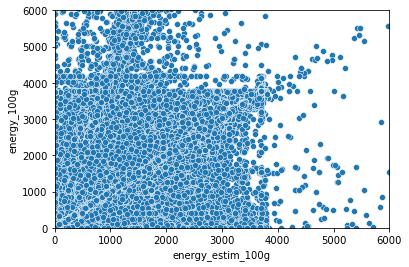

In [16]:
%%time
limit = 6000
plt.xlim(0,limit)
plt.ylim(0,limit)
sns.scatterplot(data=important_features, y="energy_100g", x="energy_estim_100g")

(1287970, 9)
Wall time: 509 ms


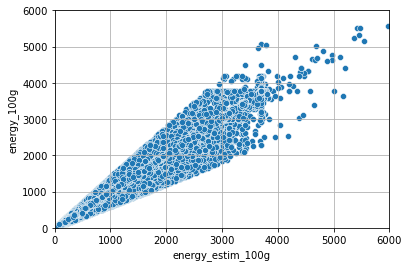

In [17]:
%%time
limit = 6000
plt.xlim(0,limit)
plt.ylim(0,limit)

important_features["error"] = abs((important_features["energy_100g"]- \
                       important_features["energy_estim_100g"])/important_features["energy_estim_100g"])

u=important_features[important_features["error"]<0.4]

sns.scatterplot(data=u, y="energy_100g", x="energy_estim_100g")
plt.grid()
print(u.shape)

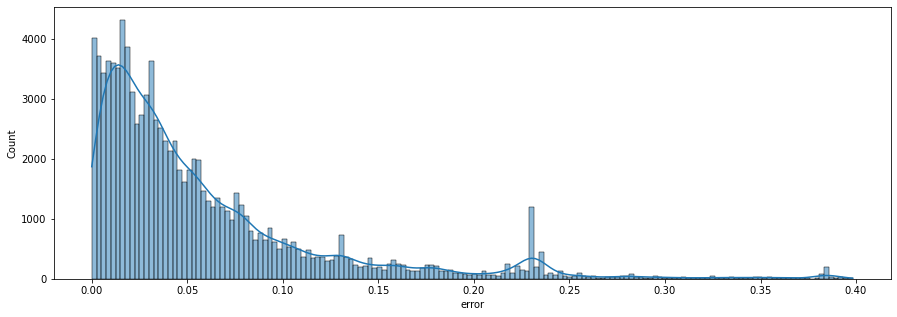

Wall time: 871 ms


In [18]:
%%time
#limit = 4000
#plt.xlim(0,limit)
#plt.ylim(0,.1)
fig=plt.figure(figsize=(15,5))
sns.histplot(data=u.iloc[:100000], x="error", kde=True)
plt.show()

#### Clean pnns_groups_2

In [19]:
%%time
dataset_openfood[dataset_openfood["pnns_groups_2"]=="Unknown"]["pnns_groups_1"].value_counts()

Wall time: 93.3 ms


Series([], Name: pnns_groups_1, dtype: int64)

In [20]:
%%time
#def capital_first_letter(string):     
dataset_openfood["pnns_groups_2"] = dataset_openfood["pnns_groups_2"].map(lambda x: x[:1].capitalize()+x[1:])

#regroup "Pizza pies and quiche" and "Pizza pies and quiches"
dataset_openfood["pnns_groups_2"] = \
                    dataset_openfood["pnns_groups_2"].map(lambda y: y+"s" if y=="Pizza pies and quiche" else y)

#regroup "Vegetables" and "Legumes"
dataset_openfood["pnns_groups_2"] = \
                    dataset_openfood["pnns_groups_2"].map(lambda y: "Vegetables" if y=="Legumes" else y)

dataset_openfood["pnns_groups_2"].value_counts()

Wall time: 1.42 s


Unknown                             1094274
Sweets                                66897
Biscuits and cakes                    60894
Dressings and sauces                  47538
Cheese                                43705
One-dish meals                        41673
Cereals                               38175
Vegetables                            37907
Processed meat                        35781
Milk and yogurt                       31115
Meat                                  27846
Fish and seafood                      25159
Sweetened beverages                   22562
Bread                                 21200
Fats                                  20460
Fruits                                16292
Alcoholic beverages                   15834
Chocolate products                    13933
Salty and fatty products              13640
Appetizers                            10794
Unsweetened beverages                  9847
Artificially sweetened beverages       9145
Breakfast cereals               

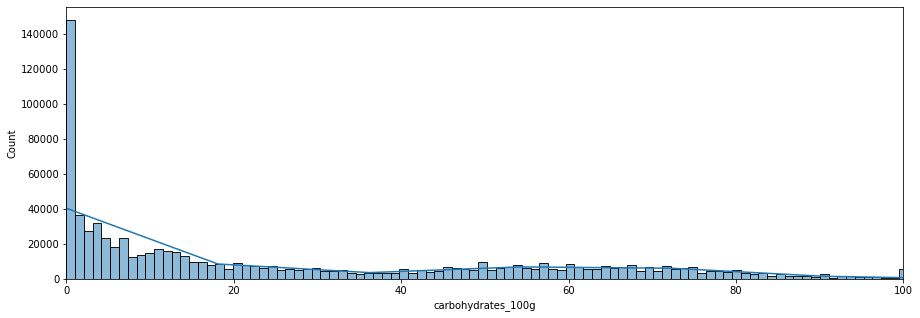

Wall time: 11.5 s


In [21]:
%%time
fig=plt.figure(figsize=(15,5))
plt.xlim(0,100)
#plt.ylim(0,400)
#u=dataset_openfood[~dataset_openfood["carbohydrates_100g"].isnull()]
sns.histplot(data=dataset_openfood.iloc[0:1000000], x="carbohydrates_100g", kde=True)
plt.show()

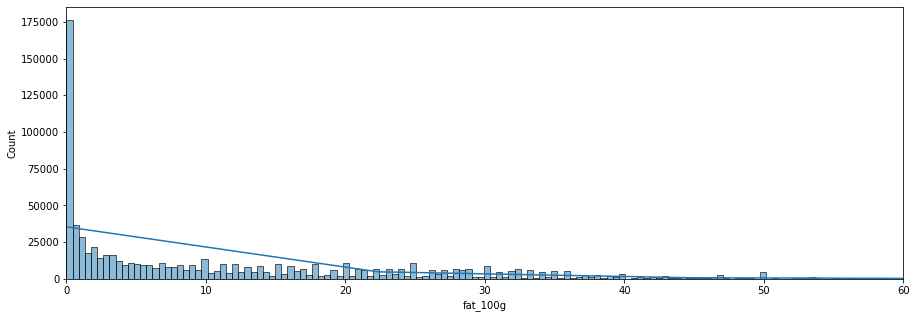

Wall time: 18.2 s


In [22]:
%%time
fig=plt.figure(figsize=(15,5))
plt.xlim(0,60)
#plt.ylim(0,400)
#u=dataset_openfood[~dataset_openfood["carbohydrates_100g"].isnull()]
sns.histplot(data=dataset_openfood.iloc[0:1000000], x="fat_100g", kde=True)
plt.show()

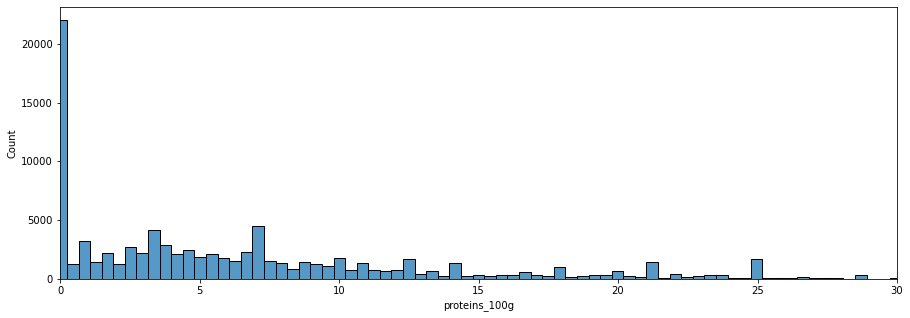

Wall time: 1.8 s


In [23]:
%%time
fig=plt.figure(figsize=(15,5))
plt.xlim(0,30)
#plt.ylim(0,400)
#u=dataset_openfood[~dataset_openfood["carbohydrates_100g"].isnull()]
sns.histplot(data=dataset_openfood.iloc[0:100000], x="proteins_100g", kde=False)
plt.show()

# Fill the missing values

#### 1 - Carbohydrates_100g

In [24]:
%%time
missing_data_carbo    = dataset_openfood[dataset_openfood["carbohydrates_100g"].isnull()]
wo_missing_data_carbo = dataset_openfood[~dataset_openfood["carbohydrates_100g"].isnull()]
missing_data_carbo.shape

Wall time: 1.68 s


(377153, 185)

In [25]:
missing_data_carbo["pnns_groups_2"].value_counts()

Unknown                             299222
Alcoholic beverages                  13897
Sweets                                9284
Meat                                  6460
Vegetables                            5071
Fruits                                3958
Cheese                                3739
Biscuits and cakes                    3335
Dressings and sauces                  3149
Processed meat                        2760
One-dish meals                        2240
Fish and seafood                      2148
Cereals                               2147
Waters and flavored waters            2136
Fats                                  1977
Bread                                 1863
Milk and yogurt                       1753
Salty and fatty products              1309
Eggs                                  1140
Sweetened beverages                    990
Pastries                               911
Chocolate products                     852
Fruit juices                           848
Nuts       

In [26]:
wo_missing_data_carbo["pnns_groups_2"].value_counts()

Unknown                             795052
Sweets                               57613
Biscuits and cakes                   57559
Dressings and sauces                 44389
Cheese                               39966
One-dish meals                       39433
Cereals                              36028
Processed meat                       33021
Vegetables                           32836
Milk and yogurt                      29362
Fish and seafood                     23011
Sweetened beverages                  21572
Meat                                 21386
Bread                                19337
Fats                                 18483
Chocolate products                   13081
Fruits                               12334
Salty and fatty products             12331
Appetizers                           10069
Unsweetened beverages                 9459
Artificially sweetened beverages      8905
Breakfast cereals                     8462
Fruit juices                          8097
Pizza pies 

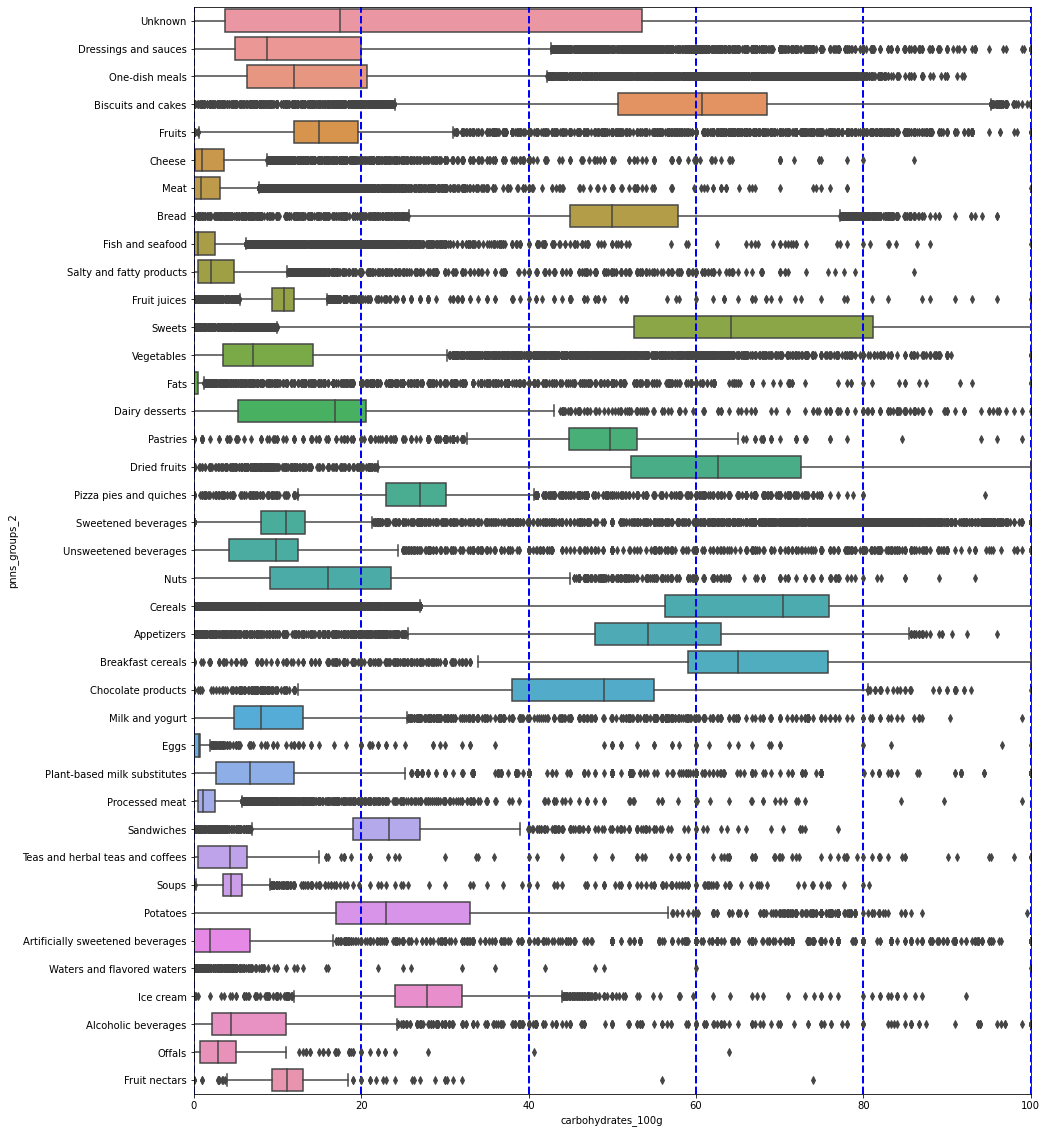

Wall time: 1.69 s


In [27]:
%%time
fig = plt.figure(figsize=(15, 20))
plt.xlim(0, 100)

plt.grid(b=True, which='major', color='b', linestyle='--', linewidth=2)
#plt.grid(b=True, which='minor', color='r', linestyle='--', linewidth=1)

sns.boxplot(data=wo_missing_data_carbo, y="pnns_groups_2",
                                        x="carbohydrates_100g")#, ["a","b","c","d","e"]
plt.show()

In [28]:
medians = wo_missing_data_carbo.groupby(["pnns_groups_2"])["carbohydrates_100g"].median()
medians

pnns_groups_2
Alcoholic beverages                  4.400000
Appetizers                          54.300000
Artificially sweetened beverages     2.000000
Biscuits and cakes                  60.710000
Bread                               50.000000
Breakfast cereals                   65.000000
Cereals                             70.400000
Cheese                               1.000000
Chocolate products                  49.000000
Dairy desserts                      16.900000
Dressings and sauces                 8.700000
Dried fruits                        62.600000
Eggs                                 0.600000
Fats                                 0.000000
Fish and seafood                     0.500000
Fruit juices                        10.800000
Fruit nectars                       11.200000
Fruits                              15.000000
Ice cream                           27.925000
Meat                                 0.880000
Milk and yogurt                      8.000000
Nuts                

In [29]:
wo_missing_data_carbo.groupby(["pnns_groups_2"])["carbohydrates_100g"].apply(mode)

pnns_groups_2
Alcoholic beverages                   0.00
Appetizers                           51.00
Artificially sweetened beverages      0.00
Biscuits and cakes                   60.00
Bread                                50.00
Breakfast cereals                    60.00
Cereals                              75.00
Cheese                                0.00
Chocolate products                   52.00
Dairy desserts                       18.00
Dressings and sauces                  0.00
Dried fruits                         54.00
Eggs                                  0.00
Fats                                  0.00
Fish and seafood                      0.00
Fruit juices                         11.00
Fruit nectars                        11.00
Fruits                               12.00
Ice cream                            27.00
Meat                                  0.00
Milk and yogurt                       4.80
Nuts                                 11.00
Offals                                0.

let's fill the Carbohydrates_100g feature, using the median values

In [30]:
def fill_w_medians(row):
    #row.fillna(0)
    try:
        if (row[1] != "Unknown" and pd.isna(row[0])):
            row[0]=medians[row[1]]
        elif(row[1] == "Unknown" and pd.isna(row[0])):
            row[0]=-1
        else:
            pass
    except:
        row[0]=-1
    
    return row

In [31]:
%%time
#u=missing_data_carbo[["carbohydrates_100g", "pnns_groups_2"]]
#medians["Sweets"]
#u.iloc[0,1]
#u=u.fillna(0)
dataset_openfood.loc[:,("carbohydrates_100g", "pnns_groups_2")] = \
                dataset_openfood.loc[:,("carbohydrates_100g", "pnns_groups_2")].apply(fill_w_medians, axis=1)
#u["pnns_groups_2"].value_counts()
#print(dataset_openfood[dataset_openfood["carbohydrates_100g"].isnull()].shape)
#print(u["carbohydrates_100g"].shape)

#dataset_openfood[dataset_openfood["carbohydrates_100g"].isnull()]["carbohydrates_100g"] = \
#    dataset_openfood[dataset_openfood["carbohydrates_100g"].isnull()]["carbohydrates_100g"].replace(np.nan, 0)

#dataset_openfood[dataset_openfood["carbohydrates_100g"].isnull()].loc["carbohydrates_100g"] = \
#                                                                                        u.loc["carbohydrates_100g"]

#dataset_openfood[dataset_openfood["carbohydrates_100g"]==-1].shape

#dataset_openfood[dataset_openfood["carbohydrates_100g"].isnull()].loc[:,("carbohydrates_100g")]
#u["carbohydrates_100g"]
dataset_openfood.loc[:,("carbohydrates_100g", "pnns_groups_2")]

Wall time: 1min 17s


,carbohydrates_100g,pnns_groups_2
code,,
0000000000017,70.1,Unknown
0000000000031,-1.0,Unknown
000000000003327986,-1.0,Unknown
000000000004622327,2.6,Unknown
0000000000100,29.0,Dressings and sauces
...,...,...
9999999910128,-1.0,Unknown
999999999,-1.0,Unknown
9999999990397,2.4,Unknown


In [32]:
%%time
dataset_openfood[dataset_openfood["carbohydrates_100g"] == -1].shape

Wall time: 2.3 s


(299223, 185)

In [33]:
%%time
del medians
del missing_data_carbo
del wo_missing_data_carbo

Wall time: 869 ms


#### 2 - Fat_100g

In [34]:
%%time
missing_data_fat    = dataset_openfood[dataset_openfood["fat_100g"].isnull()]
wo_missing_data_fat = dataset_openfood[~dataset_openfood["fat_100g"].isnull()]
missing_data_fat.shape

Wall time: 1.86 s


(376705, 185)

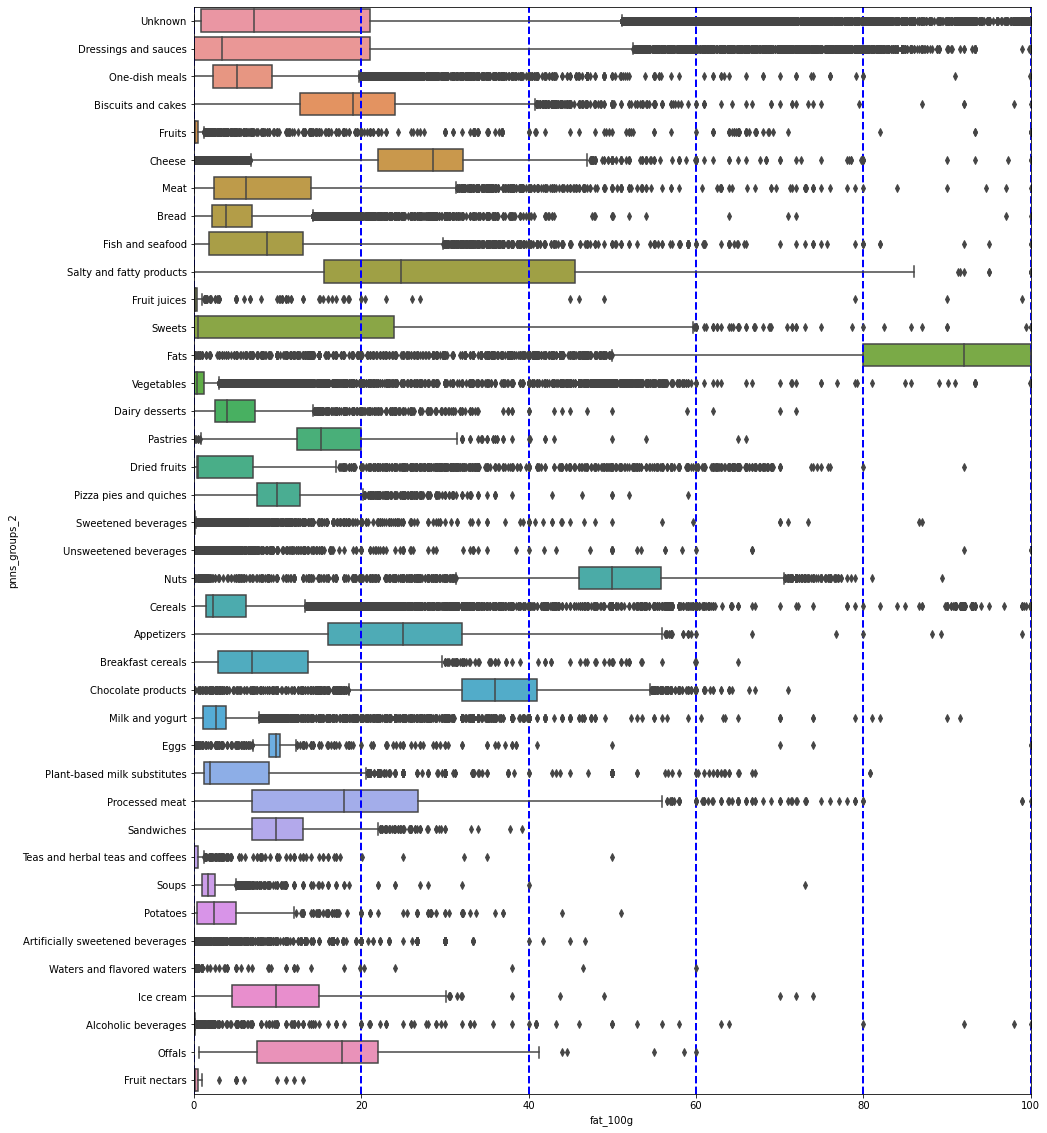

Wall time: 1.65 s


In [35]:
%%time
fig = plt.figure(figsize=(15, 20))
plt.xlim(0, 100)

plt.grid(b=True, which='major', color='b', linestyle='--', linewidth=2)
#plt.grid(b=True, which='minor', color='r', linestyle='--', linewidth=1)

sns.boxplot(data=wo_missing_data_fat, y="pnns_groups_2",
                                      x="fat_100g")#, ["a","b","c","d","e"]
plt.show()

In [36]:
medians = wo_missing_data_fat.groupby(["pnns_groups_2"])["fat_100g"].median()
medians

pnns_groups_2
Alcoholic beverages                  0.000
Appetizers                          25.000
Artificially sweetened beverages     0.000
Biscuits and cakes                  19.000
Bread                                3.800
Breakfast cereals                    7.000
Cereals                              2.300
Cheese                              28.570
Chocolate products                  36.000
Dairy desserts                       4.000
Dressings and sauces                 3.330
Dried fruits                         0.550
Eggs                                 9.800
Fats                                92.000
Fish and seafood                     8.700
Fruit juices                         0.100
Fruit nectars                        0.100
Fruits                               0.100
Ice cream                            9.880
Meat                                 6.300
Milk and yogurt                      2.700
Nuts                                50.000
Offals                              17.7

let's fill the fat_100g feature, using the median values

In [37]:
%%time
#u=dataset_openfood.loc[:,("fat_100g", "pnns_groups_2")].copy()
#medians["Sweets"]
#u.iloc[0,1]
#u=u.fillna(0)
dataset_openfood.loc[:,("fat_100g", "pnns_groups_2")] = \
                            dataset_openfood.loc[:,("fat_100g", "pnns_groups_2")].apply(fill_w_medians, axis=1)
#u["pnns_groups_2"].value_counts()
#missing_data_fat.loc[:,("fat_100g", "pnns_groups_2")]=u
#dataset_openfood[dataset_openfood["fat_100g"].isnull()].loc[:,("fat_100g", "pnns_groups_2")]=u
#dataset_openfood[dataset_openfood["fat_100g"].isnull()].loc[:,("fat_100g")] = \
#                                                                        u.loc[:,("fat_100g")]

#dataset_openfood[dataset_openfood["fat_100g"].isnull()].loc[:,("fat_100g")]
#missing_data_fat[["fat_100g", "pnns_groups_2"]]
#dataset_openfood[dataset_openfood["fat_100g"].isnull()]["fat_100g"]
#u
#dataset_openfood.loc[:,("fat_100g", "pnns_groups_2")]=u
dataset_openfood.loc[:,("fat_100g", "pnns_groups_2")]

Wall time: 1min 15s


,fat_100g,pnns_groups_2
code,,
0000000000017,7.0,Unknown
0000000000031,-1.0,Unknown
000000000003327986,-1.0,Unknown
000000000004622327,15.1,Unknown
0000000000100,8.2,Dressings and sauces
...,...,...
9999999910128,-1.0,Unknown
999999999,-1.0,Unknown
9999999990397,0.3,Unknown


In [38]:
dataset_openfood.loc[:,("fat_100g")].mean()

11.70946693992117

In [39]:
dataset_openfood[dataset_openfood["fat_100g"] == -1]

,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,abbreviated_product_name,generic_name,quantity,...,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
code,,,,,,,,,,,,,,,,,,,,,
0000000000031,http://world-en.openfoodfacts.org/product/0000...,isagoofy,1539464774,2018-10-13T21:06:14Z,1539464817,2018-10-13T21:06:57Z,Cacao,NaN,NaN,130 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
000000000003327986,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1574175736,2019-11-19T15:02:16Z,1574175737,2019-11-19T15:02:17Z,Filetes de pollo empanado,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00000000001111111111,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1560020173,2019-06-08T18:56:13Z,1560020173,2019-06-08T18:56:13Z,Sfiudwx,NaN,NaN,dgesc,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0000000000208,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1544207680,2018-12-07T18:34:40Z,1544207683,2018-12-07T18:34:43Z,Pistou d'ail des ours,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0000000000284,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1547120245,2019-01-10T11:37:25Z,1563551052,2019-07-19T15:44:12Z,Pain maïs,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9999999,http://world-en.openfoodfacts.org/product/9999...,openfoodfacts-contributors,1586217782,2020-04-07T00:03:02Z,1586217813,2020-04-07T00:03:33Z,little remedies gas relief drops,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9999999168505,http://world-en.openfoodfacts.org/product/9999...,openfoodfacts-contributors,1612050440,2021-01-30T23:47:20Z,1612100867,2021-01-31T13:47:47Z,جاري التحميل…,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9999999910128,http://world-en.openfoodfacts.org/product/9999...,kiliweb,1572513866,2019-10-31T09:24:26Z,1572513866,2019-10-31T09:24:26Z,Sandwich club Rillette poisson combava,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
%%time
del medians
del missing_data_fat
del wo_missing_data_fat

Wall time: 580 ms


#### 2 bis - Saturated fat

In [41]:
%%time
missing_data_saturated_fat    = dataset_openfood[dataset_openfood["saturated-fat_100g"].isnull()]
wo_missing_data_saturated_fat = dataset_openfood[~dataset_openfood["saturated-fat_100g"].isnull()]
missing_data_saturated_fat.shape

Wall time: 1.79 s


(420025, 185)

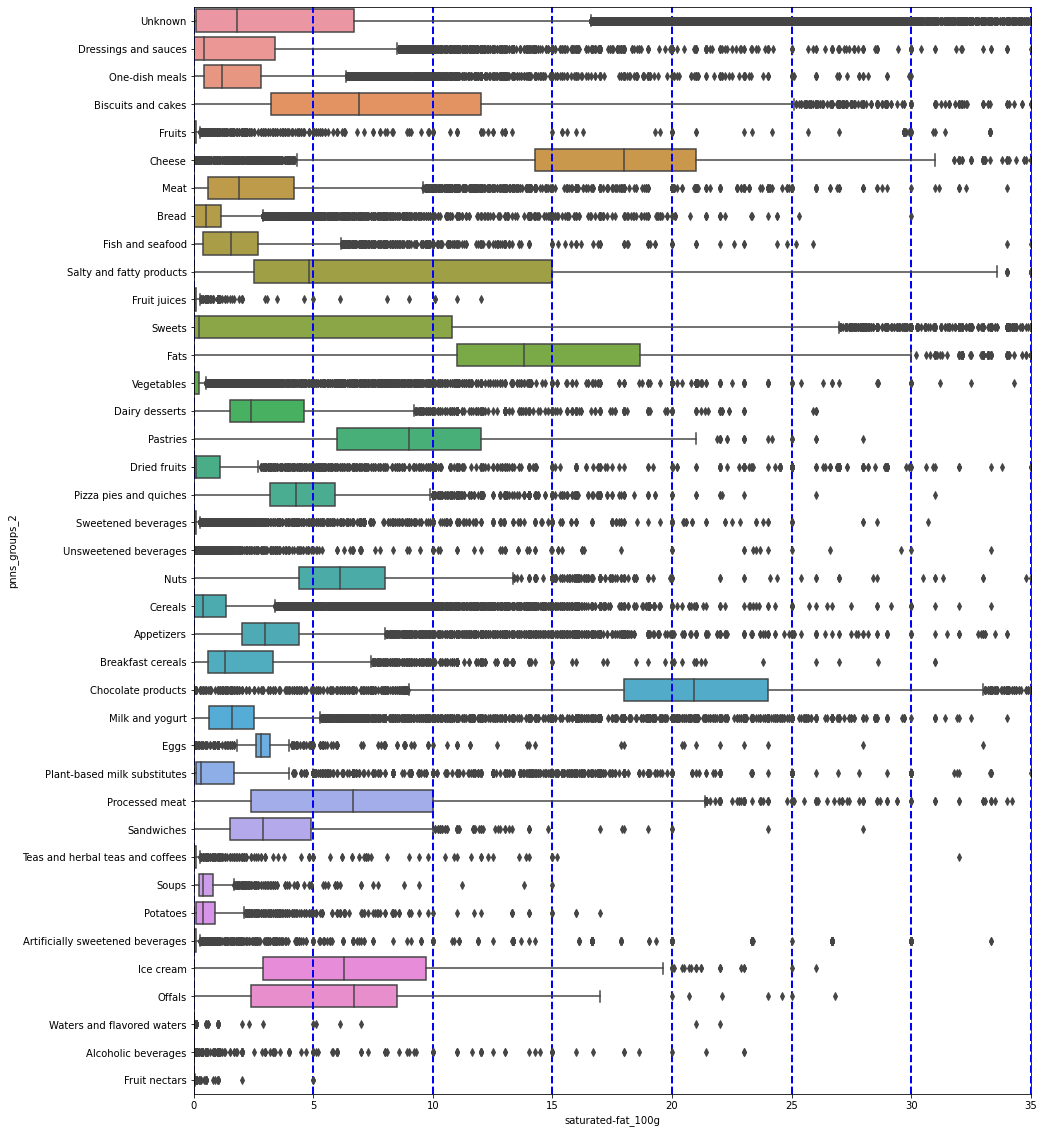

Wall time: 1.68 s


In [42]:
%%time
fig = plt.figure(figsize=(15, 20))
plt.xlim(0, 35)

plt.grid(b=True, which='major', color='b', linestyle='--', linewidth=2)
#plt.grid(b=True, which='minor', color='r', linestyle='--', linewidth=1)

sns.boxplot(data=wo_missing_data_saturated_fat, y="pnns_groups_2",
                                                x="saturated-fat_100g")#, ["a","b","c","d","e"]
plt.show()

In [43]:
wo_missing_data_saturated_fat.groupby(["pnns_groups_2"])["saturated-fat_100g"].apply(mode)

pnns_groups_2
Alcoholic beverages                  0.0
Appetizers                           3.0
Artificially sweetened beverages     0.0
Biscuits and cakes                   0.0
Bread                                0.0
Breakfast cereals                    0.0
Cereals                              0.0
Cheese                              20.0
Chocolate products                  20.0
Dairy desserts                       0.1
Dressings and sauces                 0.0
Dried fruits                         0.0
Eggs                                 3.0
Fats                                13.0
Fish and seafood                     0.0
Fruit juices                         0.0
Fruit nectars                        0.0
Fruits                               0.0
Ice cream                            0.0
Meat                                 0.0
Milk and yogurt                      0.0
Nuts                                 3.8
Offals                               8.3
One-dish meals                       0.0
Pa

In [44]:
medians = wo_missing_data_saturated_fat.groupby(["pnns_groups_2"])["saturated-fat_100g"].median()
medians

pnns_groups_2
Alcoholic beverages                  0.00
Appetizers                           3.00
Artificially sweetened beverages     0.00
Biscuits and cakes                   6.90
Bread                                0.50
Breakfast cereals                    1.30
Cereals                              0.40
Cheese                              18.00
Chocolate products                  20.90
Dairy desserts                       2.40
Dressings and sauces                 0.42
Dried fruits                         0.10
Eggs                                 2.80
Fats                                13.80
Fish and seafood                     1.54
Fruit juices                         0.00
Fruit nectars                        0.00
Fruits                               0.00
Ice cream                            6.30
Meat                                 1.90
Milk and yogurt                      1.60
Nuts                                 6.10
Offals                               6.70
One-dish meals      

In [45]:
%%time

dataset_openfood.loc[:,("saturated-fat_100g", "pnns_groups_2")] = \
        dataset_openfood.loc[:,("saturated-fat_100g", "pnns_groups_2")].apply(fill_w_medians, axis=1)

dataset_openfood.loc[:,("saturated-fat_100g", "pnns_groups_2")]

Wall time: 1min 15s


,saturated-fat_100g,pnns_groups_2
code,,
0000000000017,3.08,Unknown
0000000000031,-1.00,Unknown
000000000003327986,-1.00,Unknown
000000000004622327,6.10,Unknown
0000000000100,2.20,Dressings and sauces
...,...,...
9999999910128,-1.00,Unknown
999999999,-1.00,Unknown
9999999990397,0.00,Unknown


In [46]:
%%time
dataset_openfood[dataset_openfood["saturated-fat_100g"] == -1].shape

Wall time: 653 ms


(312152, 185)

In [47]:
%%time
del medians
del missing_data_saturated_fat
del wo_missing_data_saturated_fat

Wall time: 662 ms


#### 3 - Fiber_100g

In [48]:
%%time
missing_data_fiber    = dataset_openfood[dataset_openfood["fiber_100g"].isnull()]
wo_missing_data_fiber = dataset_openfood[~dataset_openfood["fiber_100g"].isnull()]
missing_data_fiber.shape

Wall time: 1.73 s


(1320173, 185)

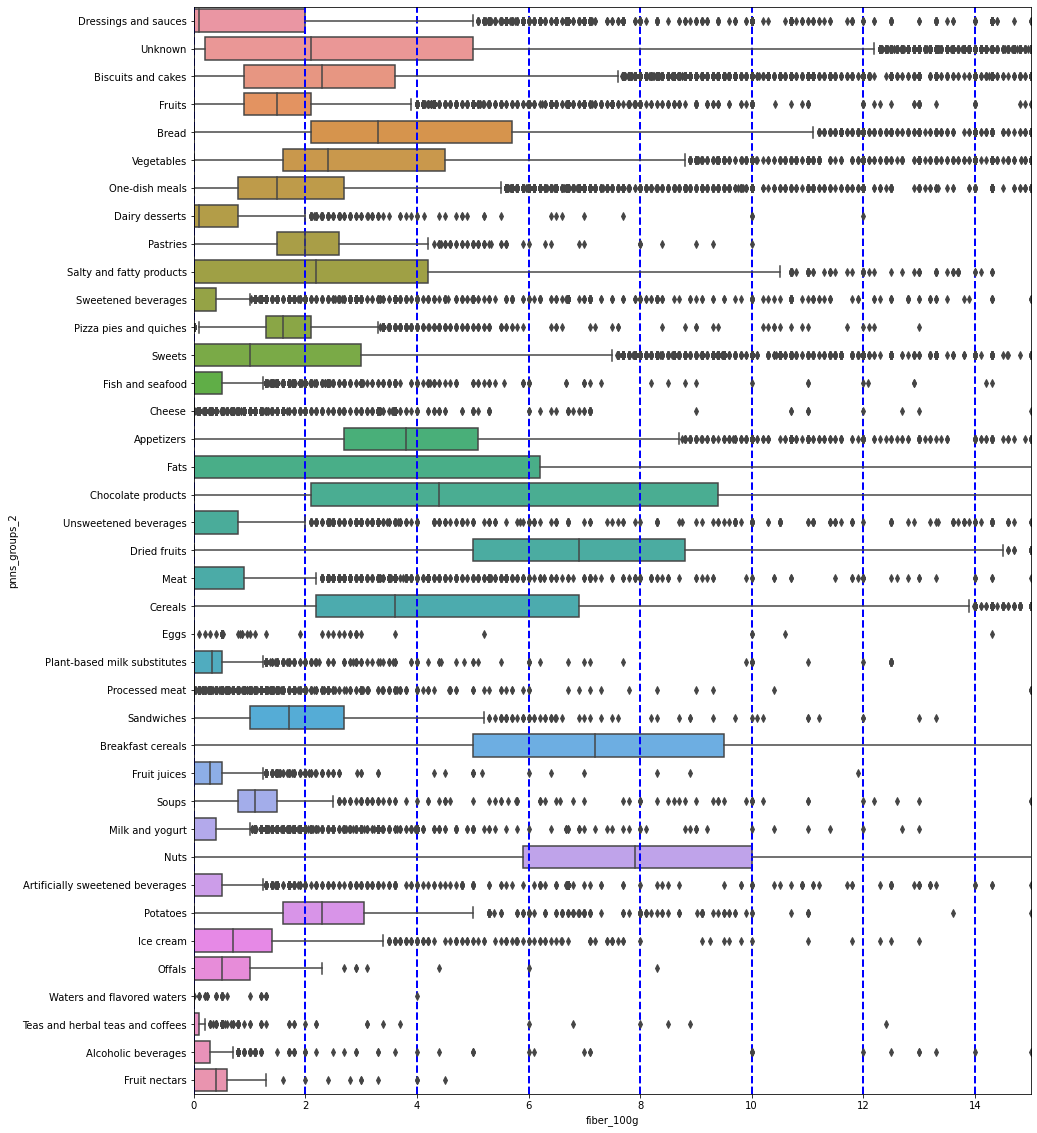

Wall time: 1.21 s


In [49]:
%%time
fig = plt.figure(figsize=(15, 20))
plt.xlim(0, 15)

plt.grid(b=True, which='major', color='b', linestyle='--', linewidth=2)
#plt.grid(b=True, which='minor', color='r', linestyle='--', linewidth=1)

sns.boxplot(data=wo_missing_data_fiber, y="pnns_groups_2",
                                        x="fiber_100g")#, ["a","b","c","d","e"]
plt.show()

In [50]:
missing_data_fiber["pnns_groups_2"].value_counts()

Unknown                             937814
Sweets                               39603
Cheese                               27523
Processed meat                       25751
Dressings and sauces                 23095
Biscuits and cakes                   22887
Meat                                 20549
One-dish meals                       17410
Milk and yogurt                      16519
Vegetables                           16432
Fish and seafood                     16146
Alcoholic beverages                  15177
Fats                                 14595
Sweetened beverages                  14308
Cereals                              12093
Salty and fatty products             10641
Chocolate products                    8393
Fruits                                8083
Bread                                 7381
Artificially sweetened beverages      6134
Fruit juices                          5968
Waters and flavored waters            5555
Appetizers                            4918
Nuts       

In [51]:
medians = wo_missing_data_fiber.groupby(["pnns_groups_2"])["fiber_100g"].median()
medians

pnns_groups_2
Alcoholic beverages                 0.00
Appetizers                          3.80
Artificially sweetened beverages    0.00
Biscuits and cakes                  2.30
Bread                               3.30
Breakfast cereals                   7.20
Cereals                             3.60
Cheese                              0.00
Chocolate products                  4.40
Dairy desserts                      0.10
Dressings and sauces                0.10
Dried fruits                        6.90
Eggs                                0.00
Fats                                0.00
Fish and seafood                    0.00
Fruit juices                        0.30
Fruit nectars                       0.40
Fruits                              1.50
Ice cream                           0.70
Meat                                0.00
Milk and yogurt                     0.00
Nuts                                7.90
Offals                              0.50
One-dish meals                      1.50
Pa

In [52]:
wo_missing_data_fiber.groupby(["pnns_groups_2"])["fiber_100g"].apply(mode)

pnns_groups_2
Alcoholic beverages                  0.0
Appetizers                           3.6
Artificially sweetened beverages     0.0
Biscuits and cakes                   0.0
Bread                                0.0
Breakfast cereals                   10.0
Cereals                              3.6
Cheese                               0.0
Chocolate products                   0.0
Dairy desserts                       0.0
Dressings and sauces                 0.0
Dried fruits                         5.0
Eggs                                 0.0
Fats                                 0.0
Fish and seafood                     0.0
Fruit juices                         0.0
Fruit nectars                        0.0
Fruits                               0.8
Ice cream                            0.0
Meat                                 0.0
Milk and yogurt                      0.0
Nuts                                10.7
Offals                               0.0
One-dish meals                       0.0
Pa

In [53]:
%%time

dataset_openfood.loc[:,("fiber_100g", "pnns_groups_2")] = \
                dataset_openfood.loc[:,("fiber_100g", "pnns_groups_2")].apply(fill_w_medians, axis=1)

dataset_openfood.loc[:,("fiber_100g", "pnns_groups_2")]

Wall time: 1min 24s


,fiber_100g,pnns_groups_2
code,,
0000000000017,-1.0,Unknown
0000000000031,-1.0,Unknown
000000000003327986,-1.0,Unknown
000000000004622327,-1.0,Unknown
0000000000100,0.0,Dressings and sauces
...,...,...
9999999910128,-1.0,Unknown
999999999,-1.0,Unknown
9999999990397,-1.0,Unknown


In [54]:
%%time
dataset_openfood[dataset_openfood["fiber_100g"] != -1].shape

Wall time: 1.51 s


(853005, 185)

In [55]:
%%time
del medians
del missing_data_fiber
del wo_missing_data_fiber

Wall time: 731 ms


#### 4 - Proteins_100g

In [56]:
%%time
missing_data_proteins    = dataset_openfood[dataset_openfood["proteins_100g"].isnull()]
wo_missing_data_proteins = dataset_openfood[~dataset_openfood["proteins_100g"].isnull()]
missing_data_proteins.shape

Wall time: 1.91 s


(375659, 185)

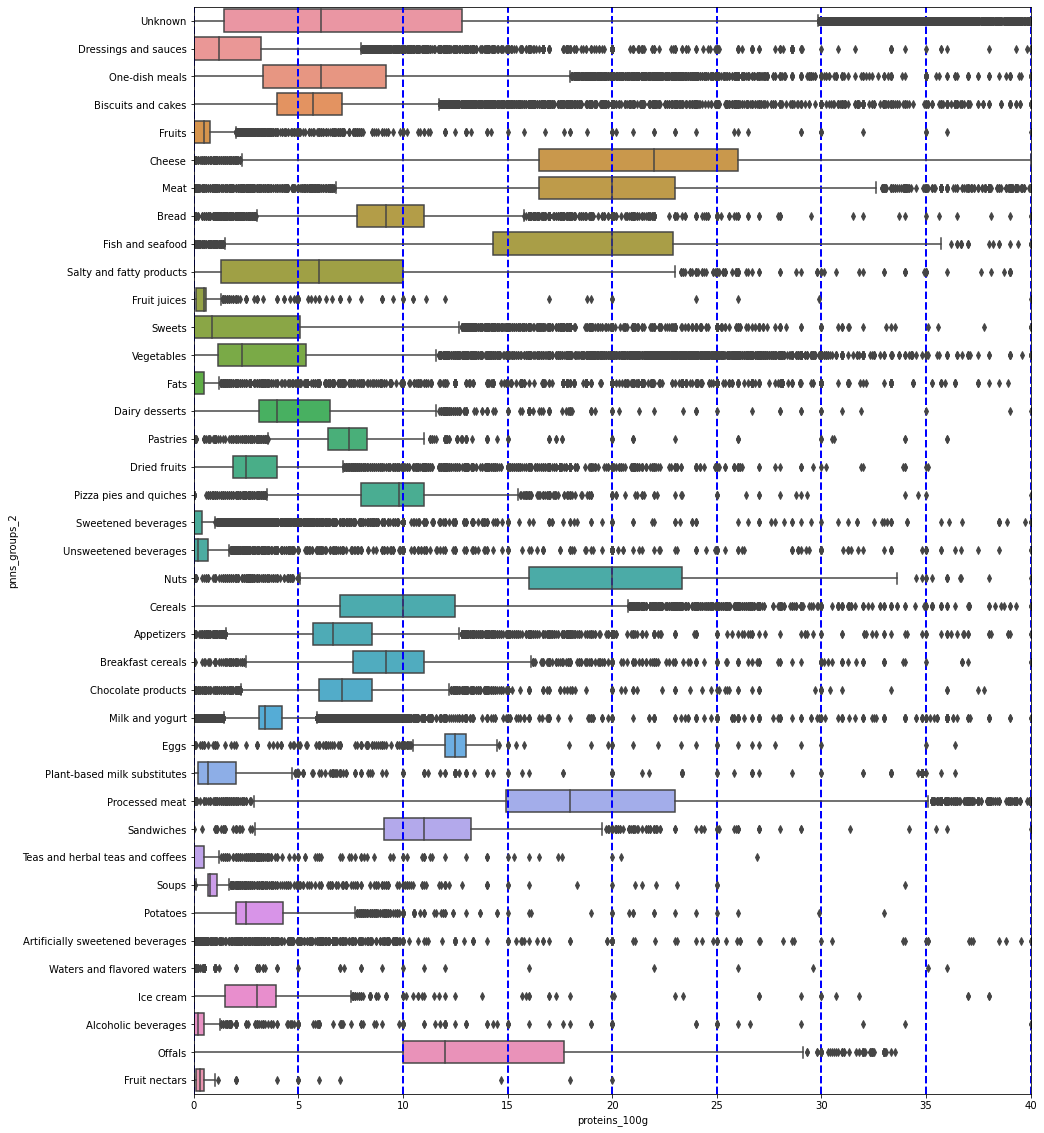

Wall time: 1.73 s


In [57]:
%%time
fig = plt.figure(figsize=(15, 20))
plt.xlim(0, 40)

plt.grid(b=True, which='major', color='b', linestyle='--', linewidth=2)
#plt.grid(b=True, which='minor', color='r', linestyle='--', linewidth=1)

sns.boxplot(data=wo_missing_data_proteins, y="pnns_groups_2",
                                           x="proteins_100g")#, ["a","b","c","d","e"]
plt.show()

In [58]:
medians = wo_missing_data_proteins.groupby(["pnns_groups_2"])["proteins_100g"].median()
medians

pnns_groups_2
Alcoholic beverages                  0.20
Appetizers                           6.67
Artificially sweetened beverages     0.00
Biscuits and cakes                   5.71
Bread                                9.20
Breakfast cereals                    9.20
Cereals                             10.00
Cheese                              22.00
Chocolate products                   7.10
Dairy desserts                       4.00
Dressings and sauces                 1.20
Dried fruits                         2.50
Eggs                                12.50
Fats                                 0.00
Fish and seafood                    20.00
Fruit juices                         0.50
Fruit nectars                        0.30
Fruits                               0.50
Ice cream                            3.00
Meat                                20.00
Milk and yogurt                      3.40
Nuts                                20.00
Offals                              12.00
One-dish meals      

In [59]:
wo_missing_data_proteins.groupby(["pnns_groups_2"])["proteins_100g"].apply(mode)

pnns_groups_2
Alcoholic beverages                  0.00
Appetizers                           7.14
Artificially sweetened beverages     0.00
Biscuits and cakes                   6.00
Bread                               10.00
Breakfast cereals                   11.00
Cereals                             12.50
Cheese                              25.00
Chocolate products                   7.00
Dairy desserts                       3.00
Dressings and sauces                 0.00
Dried fruits                         2.00
Eggs                                12.00
Fats                                 0.00
Fish and seafood                    22.00
Fruit juices                         0.50
Fruit nectars                        0.50
Fruits                               0.00
Ice cream                            0.50
Meat                                23.00
Milk and yogurt                      3.33
Nuts                                20.00
Offals                              11.00
One-dish meals      

In [60]:
%%time
#u=missing_data_proteins[["proteins_100g", "pnns_groups_2"]]
#medians["Sweets"]
#u.iloc[0,1]
#u=u.fillna(0)
#u=u.apply(fill_w_medians, axis=1)
#u["pnns_groups_2"].value_counts()
dataset_openfood.loc[:,("proteins_100g", "pnns_groups_2")] = \
                dataset_openfood.loc[:,("proteins_100g", "pnns_groups_2")].apply(fill_w_medians, axis=1)

dataset_openfood.loc[:,("proteins_100g", "pnns_groups_2")]

Wall time: 1min 14s


,proteins_100g,pnns_groups_2
code,,
0000000000017,7.8,Unknown
0000000000031,-1.0,Unknown
000000000003327986,-1.0,Unknown
000000000004622327,15.7,Unknown
0000000000100,5.1,Dressings and sauces
...,...,...
9999999910128,-1.0,Unknown
999999999,-1.0,Unknown
9999999990397,1.6,Unknown


In [61]:
%%time
dataset_openfood[dataset_openfood["proteins_100g"] == -1].shape

Wall time: 663 ms


(298348, 185)

In [62]:
%%time
del medians
del missing_data_proteins
del wo_missing_data_proteins

Wall time: 711 ms


#### 5 - Sodium_100g

In [63]:
%%time
missing_data_sodium    = dataset_openfood[dataset_openfood["sodium_100g"].isnull()]
wo_missing_data_sodium = dataset_openfood[~dataset_openfood["sodium_100g"].isnull()]
missing_data_sodium.shape

Wall time: 1.7 s


(429672, 185)

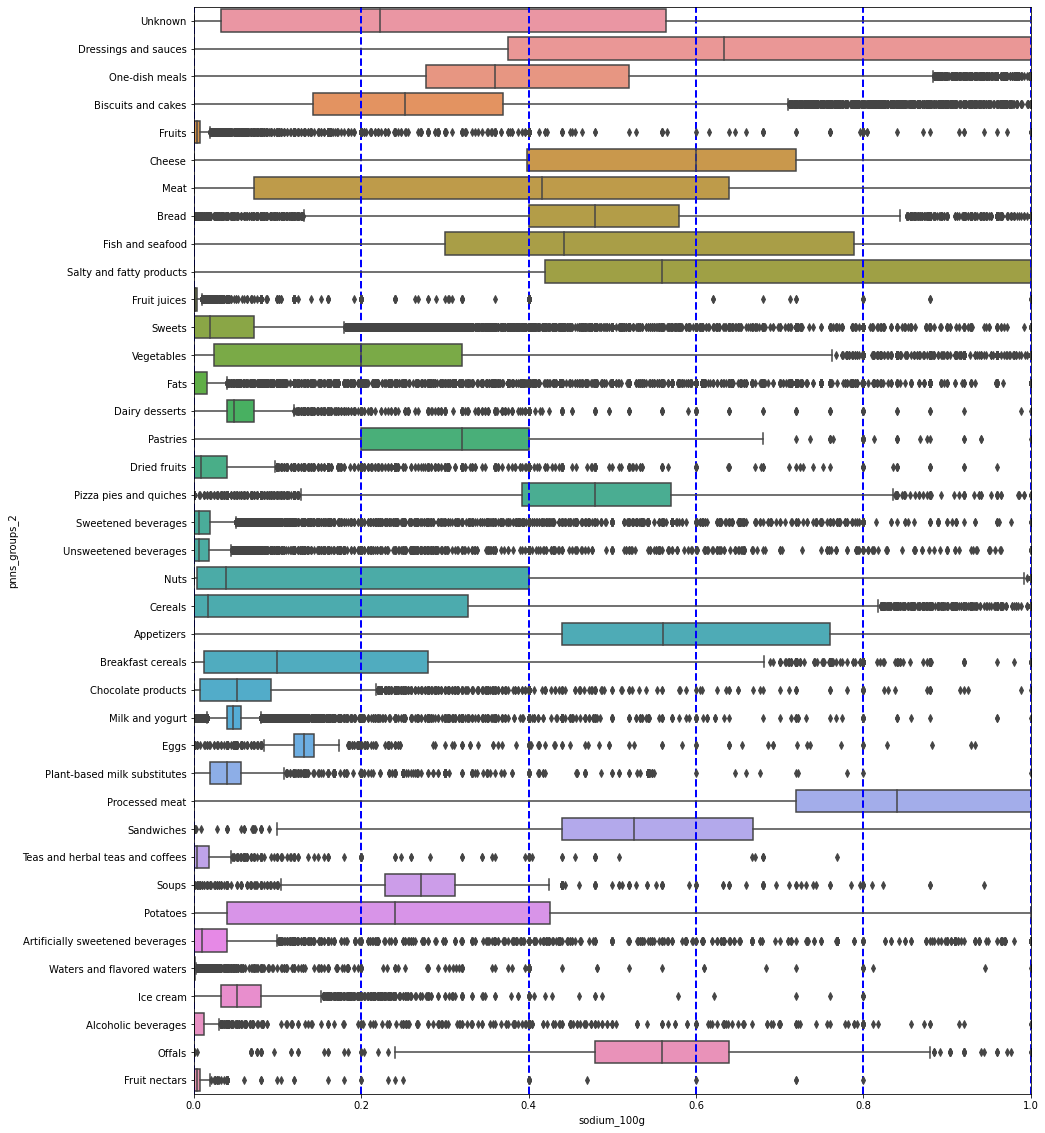

Wall time: 1.64 s


In [64]:
%%time
fig = plt.figure(figsize=(15, 20))
plt.xlim(0, 1)

plt.grid(b=True, which='major', color='b', linestyle='--', linewidth=2)

sns.boxplot(data=wo_missing_data_sodium, y="pnns_groups_2",
                                         x="sodium_100g")
plt.show()

In [65]:
medians = wo_missing_data_sodium.groupby(["pnns_groups_2"])["sodium_100g"].median()
medians

pnns_groups_2
Alcoholic beverages                 0.000000
Appetizers                          0.561000
Artificially sweetened beverages    0.010000
Biscuits and cakes                  0.252000
Bread                               0.480000
Breakfast cereals                   0.100000
Cereals                             0.017000
Cheese                              0.600000
Chocolate products                  0.052000
Dairy desserts                      0.048000
Dressings and sauces                0.633000
Dried fruits                        0.009200
Eggs                                0.132000
Fats                                0.000000
Fish and seafood                    0.442000
Fruit juices                        0.002000
Fruit nectars                       0.004000
Fruits                              0.004000
Ice cream                           0.052000
Meat                                0.416000
Milk and yogurt                     0.047000
Nuts                                0.038

In [66]:
wo_missing_data_sodium.groupby(["pnns_groups_2"])["sodium_100g"].apply(mode)

pnns_groups_2
Alcoholic beverages                 0.00
Appetizers                          0.52
Artificially sweetened beverages    0.00
Biscuits and cakes                  0.20
Bread                               0.40
Breakfast cereals                   0.00
Cereals                             0.00
Cheese                              0.60
Chocolate products                  0.00
Dairy desserts                      0.04
Dressings and sauces                0.00
Dried fruits                        0.00
Eggs                                0.12
Fats                                0.00
Fish and seafood                    0.40
Fruit juices                        0.00
Fruit nectars                       0.00
Fruits                              0.00
Ice cream                           0.04
Meat                                0.56
Milk and yogurt                     0.04
Nuts                                0.00
Offals                              0.60
One-dish meals                      0.40
Pa

In [67]:
%%time

dataset_openfood.loc[:,("sodium_100g", "pnns_groups_2")] = \
                dataset_openfood.loc[:,("sodium_100g", "pnns_groups_2")].apply(fill_w_medians, axis=1)

dataset_openfood.loc[:,("sodium_100g", "pnns_groups_2")]

Wall time: 1min 14s


,sodium_100g,pnns_groups_2
code,,
0000000000017,0.560,Unknown
0000000000031,-1.000,Unknown
000000000003327986,-1.000,Unknown
000000000004622327,0.840,Unknown
0000000000100,1.840,Dressings and sauces
...,...,...
9999999910128,-1.000,Unknown
999999999,-1.000,Unknown
9999999990397,0.256,Unknown


In [68]:
%%time
dataset_openfood[dataset_openfood["sodium_100g"] == -1].shape

Wall time: 697 ms


(344651, 185)

In [69]:
%%time
del medians
del missing_data_sodium
del wo_missing_data_sodium

Wall time: 560 ms


#### 5-bis - Salt_100g

In [70]:
%%time
missing_data_salt    = dataset_openfood[dataset_openfood["salt_100g"].isnull()]
wo_missing_data_salt = dataset_openfood[~dataset_openfood["salt_100g"].isnull()]
missing_data_salt.shape

Wall time: 1.78 s


(429668, 185)

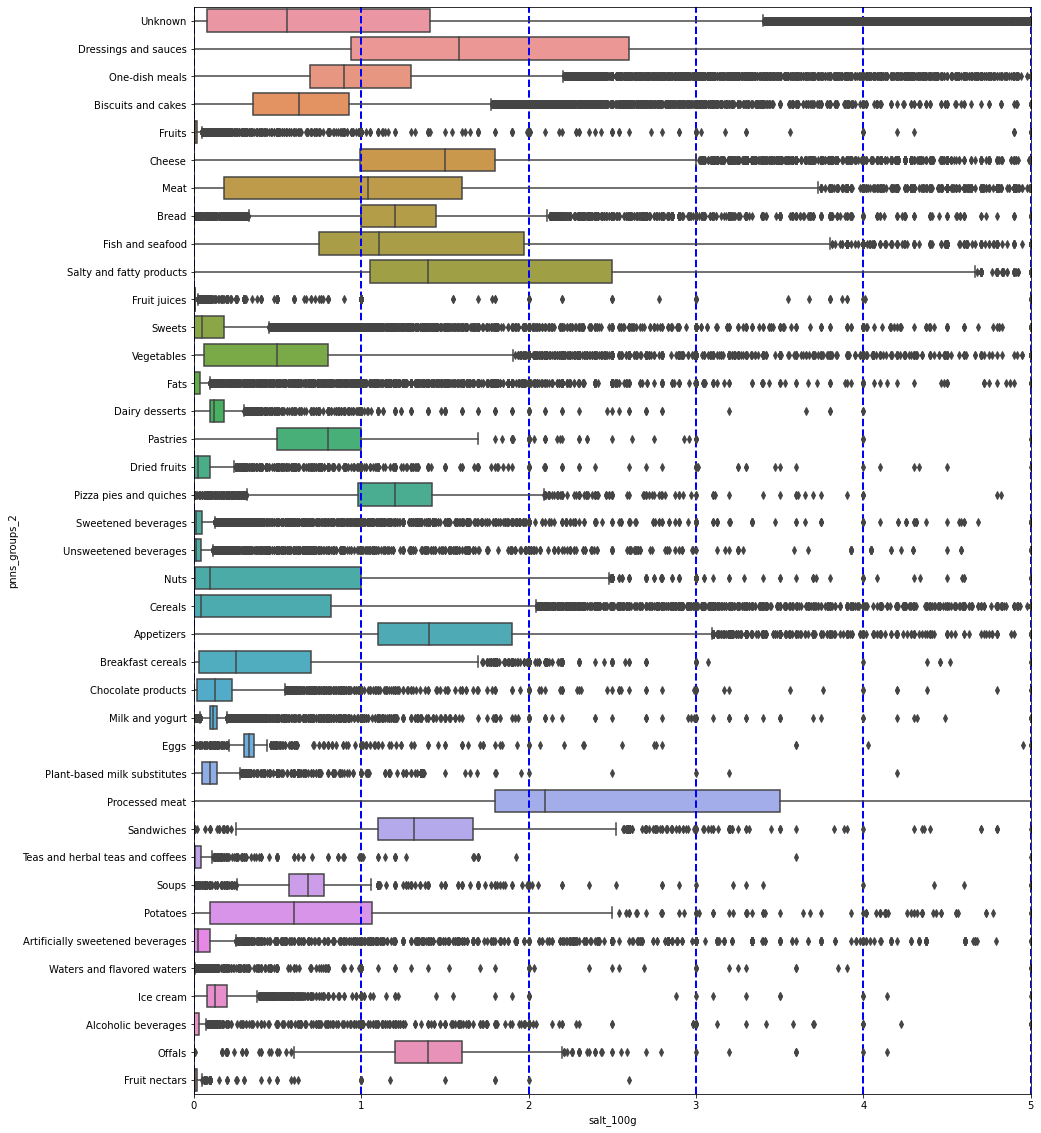

Wall time: 1.63 s


In [71]:
%%time
fig = plt.figure(figsize=(15, 20))
plt.xlim(0, 5)

plt.grid(b=True, which='major', color='b', linestyle='--', linewidth=2)

sns.boxplot(data=wo_missing_data_salt, y="pnns_groups_2",
                                         x="salt_100g")
plt.show()

In [72]:
medians = wo_missing_data_salt.groupby(["pnns_groups_2"])["sodium_100g"].median()
medians

pnns_groups_2
Alcoholic beverages                 0.000000
Appetizers                          0.561000
Artificially sweetened beverages    0.010000
Biscuits and cakes                  0.252000
Bread                               0.480000
Breakfast cereals                   0.100000
Cereals                             0.017000
Cheese                              0.600000
Chocolate products                  0.052000
Dairy desserts                      0.048000
Dressings and sauces                0.633000
Dried fruits                        0.009200
Eggs                                0.132000
Fats                                0.000000
Fish and seafood                    0.442000
Fruit juices                        0.002000
Fruit nectars                       0.004000
Fruits                              0.004000
Ice cream                           0.052000
Meat                                0.416000
Milk and yogurt                     0.047000
Nuts                                0.038

In [73]:
%%time

dataset_openfood.loc[:,("salt_100g", "pnns_groups_2")] = \
                dataset_openfood.loc[:,("salt_100g", "pnns_groups_2")].apply(fill_w_medians, axis=1)

dataset_openfood.loc[:,("salt_100g", "pnns_groups_2")]

Wall time: 1min 15s


,salt_100g,pnns_groups_2
code,,
0000000000017,1.40,Unknown
0000000000031,-1.00,Unknown
000000000003327986,-1.00,Unknown
000000000004622327,2.10,Unknown
0000000000100,4.60,Dressings and sauces
...,...,...
9999999910128,-1.00,Unknown
999999999,-1.00,Unknown
9999999990397,0.64,Unknown


In [74]:
%%time
dataset_openfood[dataset_openfood["salt_100g"] == -1].shape

Wall time: 676 ms


(344649, 185)

In [75]:
#train_data[train_data["salt_100g"].isnull()]["pnns_groups_2"]

In [76]:
%%time

del missing_data_salt
del wo_missing_data_salt
del medians

Wall time: 642 ms


#### 6 - fruits-vegetables-nuts-estimate_100g

In [77]:
%%time
missing_data_veg    = dataset_openfood[dataset_openfood["fruits-vegetables-nuts-estimate_100g"].isnull()]
wo_missing_data_veg = dataset_openfood[~dataset_openfood["fruits-vegetables-nuts-estimate_100g"].isnull()]
missing_data_veg.shape

Wall time: 1.55 s


(1779077, 185)

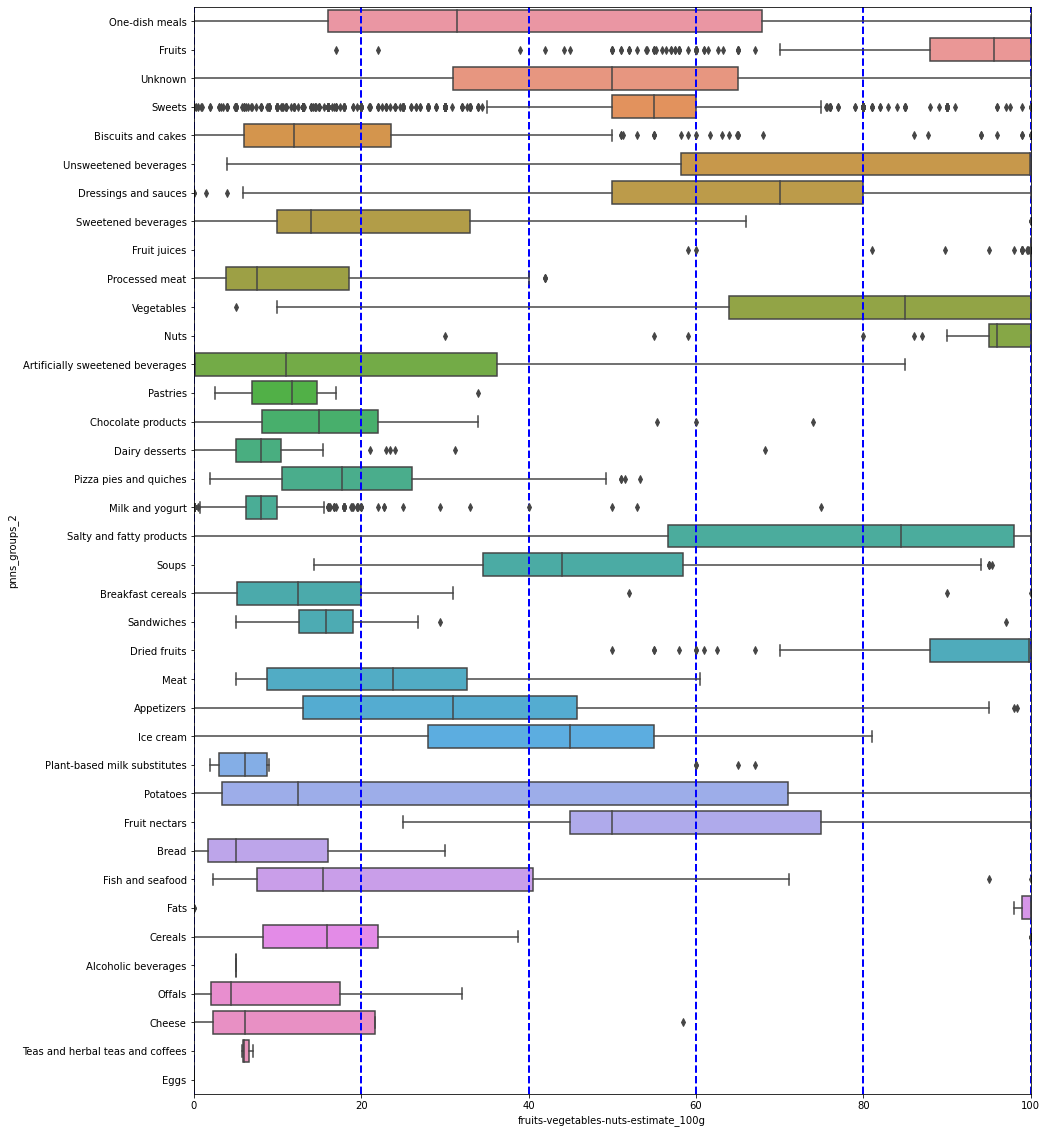

Wall time: 700 ms


In [78]:
%%time
fig = plt.figure(figsize=(15, 20))
plt.xlim(0, 100)

plt.grid(b=True, which='major', color='b', linestyle='--', linewidth=2)
#plt.grid(b=True, which='minor', color='r', linestyle='--', linewidth=1)

sns.boxplot(data=wo_missing_data_veg, y="pnns_groups_2",
                                      x="fruits-vegetables-nuts-estimate_100g")
plt.show()

In [79]:
missing_data_veg.groupby(["pnns_groups_2"])["fruits-vegetables-nuts-estimate_100g"].count()

pnns_groups_2
Alcoholic beverages                 0
Appetizers                          0
Artificially sweetened beverages    0
Biscuits and cakes                  0
Bread                               0
Breakfast cereals                   0
Cereals                             0
Cheese                              0
Chocolate products                  0
Dairy desserts                      0
Dressings and sauces                0
Dried fruits                        0
Eggs                                0
Fats                                0
Fish and seafood                    0
Fruit juices                        0
Fruit nectars                       0
Fruits                              0
Ice cream                           0
Meat                                0
Milk and yogurt                     0
Nuts                                0
Offals                              0
One-dish meals                      0
Pastries                            0
Pizza pies and quiches              

In [80]:
missing_data_veg["pnns_groups_2"]

code
0000000000017                      Unknown
0000000000031                      Unknown
000000000003327986                 Unknown
000000000004622327                 Unknown
0000000000100         Dressings and sauces
                              ...         
9999999910128                      Unknown
999999999                          Unknown
9999999990397                      Unknown
9999999999994                      Unknown
999999999999999                    Unknown
Name: pnns_groups_2, Length: 1779077, dtype: object

In [81]:
#wo_missing_data_veg.groupby(["pnns_groups_2"])["fruits-vegetables-nuts-estimate_100g"].count()

In [82]:
medians = wo_missing_data_veg.groupby(["pnns_groups_2"])["fruits-vegetables-nuts-estimate_100g"].median()
medians

pnns_groups_2
Alcoholic beverages                   5.00
Appetizers                           31.00
Artificially sweetened beverages     11.00
Biscuits and cakes                   12.00
Bread                                 5.00
Breakfast cereals                    12.50
Cereals                              15.90
Cheese                                6.15
Chocolate products                   15.00
Dairy desserts                        8.00
Dressings and sauces                 70.00
Dried fruits                         99.80
Eggs                                  0.00
Fats                                100.00
Fish and seafood                     15.45
Fruit juices                        100.00
Fruit nectars                        50.00
Fruits                               95.65
Ice cream                            45.00
Meat                                 23.75
Milk and yogurt                       8.00
Nuts                                 96.00
Offals                                4.

In [83]:
%%time

dataset_openfood.loc[:,("fruits-vegetables-nuts-estimate_100g", "pnns_groups_2")] = \
        dataset_openfood.loc[:,("fruits-vegetables-nuts-estimate_100g", "pnns_groups_2")].apply(fill_w_medians, axis=1)

dataset_openfood.loc[:,("fruits-vegetables-nuts-estimate_100g", "pnns_groups_2")]

Wall time: 1min 29s


,fruits-vegetables-nuts-estimate_100g,pnns_groups_2
code,,
0000000000017,-1.0,Unknown
0000000000031,-1.0,Unknown
000000000003327986,-1.0,Unknown
000000000004622327,-1.0,Unknown
0000000000100,70.0,Dressings and sauces
...,...,...
9999999910128,-1.0,Unknown
999999999,-1.0,Unknown
9999999990397,-1.0,Unknown


In [84]:
%%time
dataset_openfood[dataset_openfood["fruits-vegetables-nuts-estimate_100g"] == -1].shape

Wall time: 1.53 s


(1100067, 185)

In [85]:
%%time
del medians
del missing_data_veg
del wo_missing_data_veg

Wall time: 156 ms


In [86]:
time2 = time.time()
time2 - time1

816.7951264381409

In [87]:
dataset_openfood["energy_estim_100g"] = 17*dataset_openfood[feature2]+37*dataset_openfood[feature2b]+\
                                    17*dataset_openfood[feature2t]+8*dataset_openfood[feature2f]

dataset_openfood[["energy_100g", "energy_estim_100g", "carbohydrates_100g", "fat_100g",
                  "fiber_100g","proteins_100g", "salt_100g"]].info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 1790823 entries, 0000000000017 to 999999999999999
Data columns (total 7 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   energy_100g         1422225 non-null  float64
 1   energy_estim_100g   1790823 non-null  float64
 2   carbohydrates_100g  1790823 non-null  float64
 3   fat_100g            1790823 non-null  float64
 4   fiber_100g          1790823 non-null  float64
 5   proteins_100g       1790823 non-null  float64
 6   salt_100g           1790823 non-null  float64
dtypes: float64(7)
memory usage: 189.3+ MB


(1143010, 187)
Wall time: 2.37 s


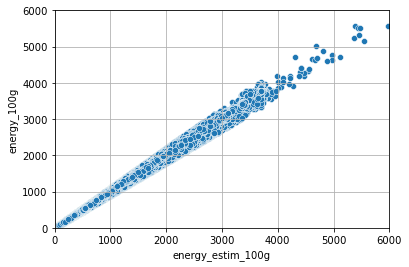

In [88]:
%%time
limit = 6000
plt.xlim(0,limit)
plt.ylim(0,limit)

dataset_openfood["error"] = abs((dataset_openfood["energy_100g"]- \
                       dataset_openfood["energy_estim_100g"])/dataset_openfood["energy_estim_100g"])

u=dataset_openfood[dataset_openfood["error"]<0.1]

sns.scatterplot(data=u, y="energy_100g", x="energy_estim_100g")
plt.grid()
print(u.shape)

# Correlation matrix

In [89]:
%%time
dico={"a":1,"b":2,"c":3,"d":4,"e":5}
train_data = dataset_openfood[~dataset_openfood["nutriscore_score"].isnull()].copy()
train_data.loc[:,"num_grade"] = train_data.loc[:,"nutriscore_grade"].replace(dico, regex=True)
train_data.shape

Wall time: 5.18 s


(666520, 188)

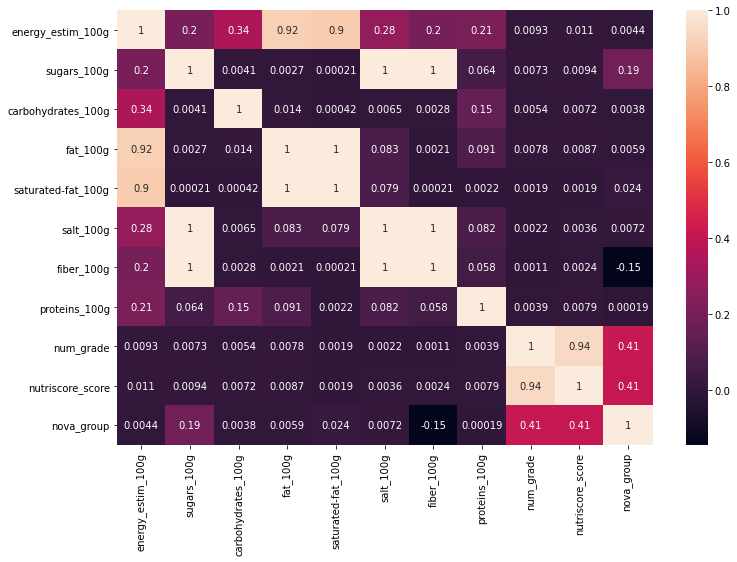

Wall time: 1.6 s


In [90]:
%%time
plt.figure(figsize=(12, 8))
#dico={"a":1,"b":2,"c":3,"d":4,"e":5}
#train_data["num_grade"] = train_data["nutriscore_grade"].replace(dico, regex=True)
features = train_data[["energy_estim_100g", "sugars_100g", "carbohydrates_100g", "fat_100g", "saturated-fat_100g", 
                       "salt_100g", "fiber_100g", "proteins_100g", 
                       "num_grade", "nutriscore_score", "nova_group"]]
corrMatrix = features.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [91]:
features[features["energy_estim_100g"]>0].shape

(658370, 11)

## correlations 

#### 1 -  Energy_estim_100g

Wall time: 320 ms


<AxesSubplot:xlabel='nutriscore_grade', ylabel='energy_estim_100g'>

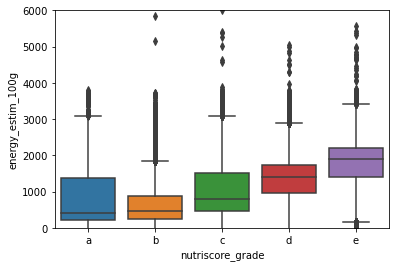

In [92]:
%%time
plt.ylim(0, 6000)
sns.boxplot(data=train_data, y="energy_estim_100g", 
                             x="nutriscore_grade",
                             order=["a","b","c","d","e"])

#### 2 - Carbohydrates_100g

Wall time: 224 ms


<AxesSubplot:xlabel='nutriscore_grade', ylabel='carbohydrates_100g'>

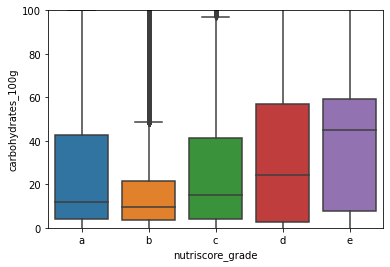

In [93]:
%%time
plt.ylim(0, 100)
sns.boxplot(data=train_data, y="carbohydrates_100g", 
                             x="nutriscore_grade",
                             order=["a","b","c","d","e"])

#### 3 - Fat_100g

Wall time: 204 ms


<AxesSubplot:xlabel='nutriscore_grade', ylabel='fat_100g'>

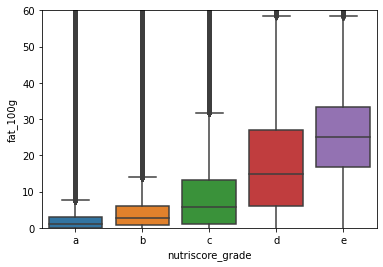

In [94]:
%%time
plt.ylim(0, 60)
sns.boxplot(data=train_data, y="fat_100g", 
                             x="nutriscore_grade",
                             order=["a","b","c","d","e"])

In [95]:
R_2 = np.corrcoef(train_data["energy_estim_100g"],
                  train_data["nutriscore_score"])**2
R_2

array([[1.00000000e+00, 1.26995982e-04],
       [1.26995982e-04, 1.00000000e+00]])

Wall time: 215 ms


<AxesSubplot:xlabel='carbohydrates_100g', ylabel='energy_estim_100g'>

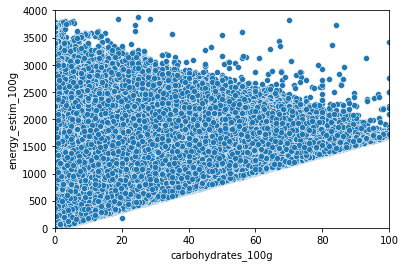

In [96]:
%%time
plt.xlim(0, 100)
plt.ylim(0, 4000)
sns.scatterplot(data=train_data, y="energy_estim_100g", x="carbohydrates_100g")

In [ ]:
%%time
plt.xlim(0, 100)
plt.ylim(0, 4000)
sns.scatterplot(data=train_data, y="energy_estim_100g", x="fat_100g")

# Training

In [97]:
%%time

X = train_data[["energy_estim_100g", "carbohydrates_100g", "fat_100g", "saturated-fat_100g", 
                       "sodium_100g", "fiber_100g", "proteins_100g"]]
X = X[train_data["error"]<0.1]

y     = train_data["nutriscore_grade"]
y     = y[train_data["error"]<0.1]

y_reg = train_data["nutriscore_score"]
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.20)

Wall time: 595 ms


In [98]:
X.shape

(572436, 7)

#### 0 - Multiple Regression

In [ ]:
%%time 

regr = linear_model.LinearRegression()
#cross_val_score(regr, X, y_reg, cv=5)

In [ ]:
%%time
regr.fit(X, y_reg)

In [ ]:
%%time

plt.xlim(-15, 40)
plt.ylim(-15, 40)
y_pred = regr.predict(X)
sns.scatterplot(y_pred, y_reg)

#### 1 - DecisionTreeClassifier

In [ ]:
%%time 

clf = DecisionTreeClassifier(random_state=0)
cross_val_score(clf, X, y, cv=10)

In [ ]:
%%time 

clf.fit(X_train,y_train)

In [ ]:
%%time

y_pred = clf.predict(X_valid)
confusion_matrix(y_valid, y_pred)

In [ ]:
np.trace(confusion_matrix(y_valid, y_pred))/sum(sum(confusion_matrix(y_valid, y_pred)))

In [ ]:
clf.feature_importances_

In [ ]:
%%time
sorted_idx = clf.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], clf.feature_importances_[sorted_idx])

In [ ]:
%time
perm_importance = permutation_importance(clf, X, y)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(X.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")
#plt.show()

In [ ]:
%%time

y_pred = clf.predict(X)
confusion_matrix(y, y_pred)

In [ ]:
np.trace(confusion_matrix(y, y_pred))/sum(sum(confusion_matrix(y, y_pred)))

In [ ]:
%%time

#we are not getting the absolute value
#v = CountVectorizer(ngram_range=(1,1))
#feature_importance=pd.DataFrame({'feature':clf.get_feature_names(),'feature_importance':clf.coef_[0]})
#feature_importance.sort_values('feature_importance',ascending=False).head(10)

In [ ]:
%%time 

#result = clf.fit(X, y)
 
#feature_importances=pd.DataFrame(result.conf_int()[1]).rename(columns={1:'Coefficients'}).eval("absolute_coefficients=abs(Coefficients)")
#feature_importances.sort_values('absolute_coefficients',ascending=False).drop('Intercept')[['absolute_coefficients']]

#### 2 - RandomForestClassifier

In [99]:
%%time 

rfc = RandomForestClassifier(max_depth=20, random_state=0)
cross_val_score(rfc, X, y, cv=5)

Wall time: 6min 13s


array([0.8798564 , 0.87014246, 0.89632011, 0.86301501, 0.85503158])

In [100]:
%%time 

rfc.fit(X_train,y_train)

Wall time: 1min 20s


RandomForestClassifier(max_depth=20, random_state=0)

In [101]:
%%time

y_pred = rfc.predict(X_valid)
confusion_matrix(y_valid, y_pred)

Wall time: 2.97 s


array([[14598,   786,   373,    37,    97],
       [  774, 10907,  1366,   221,   233],
       [  274,   739, 20731,  1932,   296],
       [   84,   106,  1336, 35030,  1159],
       [  122,   205,   266,  1228, 21588]], dtype=int64)

In [102]:
np.trace(confusion_matrix(y_valid, y_pred))/sum(sum(confusion_matrix(y_valid, y_pred)))

0.8983823632171057

In [ ]:
#clf.feature_importances_

Wall time: 120 ms


<BarContainer object of 7 artists>

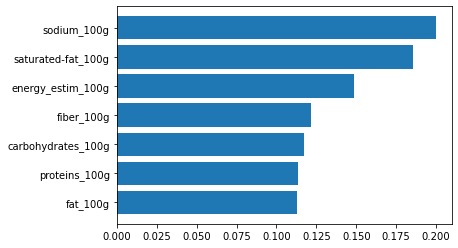

In [103]:
%%time
sorted_idx = rfc.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], rfc.feature_importances_[sorted_idx])

In [104]:
%time
perm_importance = permutation_importance(rfc, X_train, y_train)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(X.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")
plt.show()

Wall time: 0 ns


KeyboardInterrupt: 

#### 3 - KNeighborsClassifier

In [ ]:
%%time 

neigh = KNeighborsClassifier(n_neighbors=15, weights='distance', algorithm='auto', n_jobs = 16)
cross_val_score(neigh, X, y, cv=5)

In [ ]:
neigh.fit(X_train, y_train)

In [ ]:
%%time

y_pred = neigh.predict(X_valid)
confusion_matrix(y_valid, y_pred)

In [ ]:
#(sum(confusion_matrix(y, y_pred)))

In [ ]:
np.trace(confusion_matrix(y_valid, y_pred))/sum(sum(confusion_matrix(y_valid, y_pred)))

In [ ]:
%%time 

neigh = NearestNeighbors(n_neighbors=5, radius=0.4)
#cross_val_score(neigh, X, y, cv=3)

In [ ]:
%%time
neigh.fit(X, y)

# Predictions 

In [105]:
%%time 

dataset_openfood[dataset_openfood["nutriscore_grade"].isnull()][["energy_estim_100g", "carbohydrates_100g", "fat_100g", "saturated-fat_100g", 
                                                                "sodium_100g", "fiber_100g", "proteins_100g"]].shape

Wall time: 2.88 s


(1124303, 7)

In [106]:
dataset_openfood[dataset_openfood["nutriscore_grade"].isnull()].loc[:,["nutriscore_grade"]].shape

(1124303, 1)

In [107]:
%%time

#dataset_openfood[dataset_openfood["nutriscore_grade"].isnull()] = \
#                    dataset_openfood[dataset_openfood["nutriscore_grade"].isnull()].fillna(0)
#dataset_openfood[dataset_openfood["nutriscore_grade"]==0]["nutriscore_grade"]
X = dataset_openfood[dataset_openfood["nutriscore_grade"].isnull()][["energy_estim_100g", "carbohydrates_100g", "fat_100g", "saturated-fat_100g", 
                                                              "sodium_100g", "fiber_100g", "proteins_100g"]]
y_test = rfc.predict(X)

#dataset_openfood[dataset_openfood["nutriscore_grade"].isnull()].loc[:,["nutriscore_grade"]] = \
#                                                                    pd.Series(y_test, index=X.index)#rfc.predict(X)
U = dataset_openfood[dataset_openfood["nutriscore_grade"].isnull()]
U["nutriscore_grade"] = pd.Series(y_test, index=X.index)#rfc.predict(X)

dataset_openfood = pd.concat([dataset_openfood[~dataset_openfood["nutriscore_grade"].isnull()], U])
#dataset_openfood[dataset_openfood["nutriscore_grade"]==0].loc[:,("nutriscore_grade")] = y_test

<timed exec>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Wall time: 39.3 s


In [ ]:
dataset_openfood[dataset_openfood["nutriscore_grade"]==0]

In [ ]:
dataset_openfood.loc[:,["nutriscore_grade"]].value_counts()

In [ ]:
dataset_openfood["nutriscore_grade"].shape

In [ ]:
x = pd.Series(y_test, index=X.index)
x.shape

In [ ]:
x.value_counts()

In [ ]:
dataset_openfood[dataset_openfood["nutriscore_grade"]==0].loc[:,("nutriscore_grade")].value_counts()

In [ ]:
print(U.shape)
U["nutriscore_grade"].value_counts()

In [ ]:
%%time 

U.shape
Z=pd.concat([U,U])
Z.shape

In [ ]:
print(Z.shape)
dataset_openfood["nutriscore_grade"].value_counts()

In [ ]:
dataset_openfood[dataset_openfood["nutriscore_grade"]=="b"].shape

# MAIN

In [108]:
dataset_openfood[dataset_openfood["nutriscore_grade"]=="a"].groupby(["pnns_groups_2"])["proteins_100g"].mean()

pnns_groups_2
Alcoholic beverages                 11.056044
Appetizers                           9.408823
Artificially sweetened beverages     4.844468
Biscuits and cakes                  11.556099
Bread                                9.931941
Breakfast cereals                   11.461285
Cereals                             11.458098
Cheese                              11.556652
Chocolate products                   9.055000
Dairy desserts                       9.085881
Dressings and sauces                 3.372456
Dried fruits                         7.177719
Eggs                                12.436868
Fats                                18.096152
Fish and seafood                    18.541120
Fruit juices                         7.580250
Fruit nectars                        1.900000
Fruits                               0.596956
Ice cream                            4.899524
Meat                                20.928654
Milk and yogurt                      5.852911
Nuts                

In [109]:
def nutrients(sex, weight, activity, energy):
    prot=0
    fat=0
    carbo=0
    if (sex):
        if(activity):
            prot = 1.6 * weight
            fat = 1.2 * weight
            carbo = int((energy - 4 * prot - 9.5 * fat)/4)
        else:
            prot = 1.2 * weight
            fat = 1.2 * weight
            carbo = int((energy - 4 * prot - 9.5 * fat)/4)      
    else:
        if(activity):
            prot = 1.2 * weight
            fat = 1.2 * weight
            carbo = int((energy - 4 * prot - 9.5 * fat)/4)
        else:
            prot = 0.8 * weight
            fat = 1.2 * weight
            carbo = int((energy - 4 * prot - 9.5 * fat)/4) 
            
    return [prot, fat, carbo]

def clean_dataset(dataset_openfood_catA):
    x=dataset_openfood_catA[dataset_openfood_catA["pnns_groups_2"]!="Unknown"]#["proteins_100g"]
    x=x[x["proteins_100g"]<100]
    x=x[x["proteins_100g"]+x["fat_100g"]+x["carbohydrates_100g"]+x["fiber_100g"] <100]
    x=x[x["error"]<0.1]
    return x

In [129]:
%%time 

sex = True #true-->"male", false --> female
weight = 70 #kg
energy_needed = 3200 #kcal
activity = True # True-->"athletic" False--> "sedentary"


nutrients_list = nutrients(sex, weight, activity, energy_needed)
#nutrients_list
dataset_openfood_catA = dataset_openfood[dataset_openfood["nutriscore_grade"]=="a"]
dataset_openfood_catA = clean_dataset(dataset_openfood_catA)

#Proteins
food_cat_prot = dataset_openfood_catA.groupby(["pnns_groups_2"])\
                                    ["proteins_100g"].median().sort_values().iloc[-10:].index
print("You need "+ str(nutrients_list[0])+" g of protein" )
for cat in food_cat_prot:
    print (cat)
    print(dataset_openfood_catA[dataset_openfood_catA["pnns_groups_2"]==cat]\
                                            ["proteins_100g"].sort_values().iloc[-3:].sort_values(ascending=False))


You need 112.0 g of protein
Breakfast cereals
code
3111900350793    40.0
02725291         34.0
5600317479626    33.0
Name: proteins_100g, dtype: float64
Cheese
code
2112498008708    35.0
2110501006055    33.0
4002683005200    30.0
Name: proteins_100g, dtype: float64
Cereals
code
3380390130400    83.00
3476884000608    80.00
0039978113221    76.67
Name: proteins_100g, dtype: float64
Eggs
code
0070759127433    14.29
5000169482100    14.10
5000169310335    14.10
Name: proteins_100g, dtype: float64
Fats
code
0036192122695    46.67
3273120021430    36.40
0738416000054    33.33
Name: proteins_100g, dtype: float64
Nuts
code
7610807015843    32.0
3700146208731    31.0
4006040031260    30.0
Name: proteins_100g, dtype: float64
Fish and seafood
code
5999885147038    65.70
7013740885106    53.00
0853197004340    44.29
Name: proteins_100g, dtype: float64
Processed meat
code
8436558332294           40.96
00428402300120002578    31.00
3531940160006           29.20
Name: proteins_100g, dtype: float64


In [130]:
#Fat
food_cat_fat = dataset_openfood_catA.groupby(["pnns_groups_2"])["fat_100g"].median().sort_values().iloc[-5:].index
print("You need "+ str(nutrients_list[1])+" g of fat" )
for cat in food_cat_fat:
    print (cat)
    print(dataset_openfood_catA[dataset_openfood_catA["pnns_groups_2"]==cat]\
                                              ["fat_100g"].sort_values().iloc[-3:].sort_values(ascending=False))

You need 84.0 g of fat
Eggs
code
4670006380275    11.8
4607009874494    11.5
4660004310183    11.5
Name: fat_100g, dtype: float64
Salty and fatty products
code
20379827         31.0
3292070005161    27.7
8432089101422    26.8
Name: fat_100g, dtype: float64
Chocolate products
code
8437013106542    52.2
22140814          0.1
Name: fat_100g, dtype: float64
Fats
code
0870001000565    62.5
0688267036484    60.0
0091037717856    60.0
Name: fat_100g, dtype: float64
Nuts
code
3427290002229    72.3
20202408         72.1
8711521922215    72.0
Name: fat_100g, dtype: float64


In [127]:
#Carbohydrates_100g
food_cat_carbo = dataset_openfood_catA.groupby(["pnns_groups_2"])["carbohydrates_100g"].median().sort_values().iloc[-10:].index
print("You need "+ str(nutrients_list[2])+" g of carbohydrates" )
for cat in food_cat_carbo:
    print (cat)
    print(dataset_openfood_catA[dataset_openfood_catA["pnns_groups_2"]==cat]\
                       ["carbohydrates_100g"].sort_values().iloc[-3:].sort_values(ascending=False))

You need 338 g of carbohydrates
Potatoes
code
3396410018955    84.50
3229820147338    83.00
0039978033314    82.35
Name: carbohydrates_100g, dtype: float64
Sandwiches
code
8710522693285    50.00
0865336000052    48.00
0076489170794    45.88
Name: carbohydrates_100g, dtype: float64
Pizza pies and quiches
code
2000000339634    44.00
0024000248507    36.79
3596710418374    34.00
Name: carbohydrates_100g, dtype: float64
Bread
code
3263330035013    85.6
3263330100018    85.6
3396410124779    85.6
Name: carbohydrates_100g, dtype: float64
Dried fruits
code
8436034544289    84.0
3700650900398    82.1
5400706000352    81.0
Name: carbohydrates_100g, dtype: float64
Pastries
code
8001120856098    68.0
7610800027577    57.0
3419390003602    52.0
Name: carbohydrates_100g, dtype: float64
Appetizers
code
8594038915440    84.2
8594038914498    84.2
0073296028904    83.3
Name: carbohydrates_100g, dtype: float64
Biscuits and cakes
code
0072700000192    85.71
0072036708854    85.71
0073490125010    84.85


In [ ]:
dataset_openfood_catA.groupby(["pnns_groups_2"])["carbohydrates_100g"].median().sort_values()

In [ ]:
(dataset_openfood_catA.groupby(["pnns_groups_2"])["carbohydrates_100g"].median()-\
    dataset_openfood_catA.groupby(["pnns_groups_2"])["sugars_100g"].median()).sort_values()

In [ ]:
dataset_openfood_catA["proteins_100g"].sort_values()

In [ ]:
dataset_openfood_catA["fat_100g"].sort_values()

In [ ]:
dataset_openfood_catA["carbohydrates_100g"].sort_values()

In [ ]:
dataset_openfood_catA[dataset_openfood_catA["proteins_100g"]<100]["proteins_100g"].sort_values()

In [ ]:
x=dataset_openfood_catA[dataset_openfood_catA["pnns_groups_2"]!="Unknown"]#["proteins_100g"]
x=x[x["proteins_100g"]<100]
x=x[x["proteins_100g"]+x["fat_100g"]+x["carbohydrates_100g"]+x["fiber_100g"] <100]
x=x[x["error"]<0.1]
x["proteins_100g"].sort_values()

In [ ]:
x.groupby(["pnns_groups_2"])["proteins_100g"].max()

In [ ]:
x[x["pnns_groups_2"]=="Sweets"]["proteins_100g"].sort_values()

# Brouillon

In [ ]:
dataset_openfood.shape

In [ ]:
dataset_openfood.columns

In [ ]:
dataset_openfood.nutriscore_score.hist(bins=100)

In [ ]:
sns.set_palette("bright")
data_wo_nan = dataset_openfood[~dataset_openfood.nutriscore_grade.isnull()]
sns.histplot(data=data_wo_nan, x="nutriscore_score", kde=True, bins=100, color='b')

In [ ]:
#train_data["nutriscore_grade"] = pd.Categorical(train_data["nutriscore_grade"], ["a","b","c","d","e"])
#data_wo_nan = dataset_openfood[~dataset_openfood.nutriscore_grade.isnull()]
sns.countplot(data=train_data, x="nutriscore_grade", order=["a","b","c","d","e"])
#sns.histplot(dataset_openfood.nutriscore_grade)

In [ ]:
dataset_openfood.nutriscore_grade.value_counts()

In [ ]:
data_wo_nan = dataset_openfood[~dataset_openfood.nutriscore_grade.isnull()]
sns.countplot(data=data_wo_nan, x="nutriscore_grade", order=["a","b","c","d","e"])
#sns.histplot(dataset_openfood.nutriscore_grade)

In [ ]:
%%time
#sns.regplot(data=dataset_openfood, x="nutriscore_score", y="fat_100g")
data_wo_nan = dataset_openfood[~dataset_openfood.fat_100g.isnull()]
data_wo_nan_useful = data_wo_nan[data_wo_nan.fat_100g <= 1]
data_wo_nan_useful = data_wo_nan_useful[data_wo_nan_useful.fat_100g > 0]
sns.histplot(data=data_wo_nan_useful, x="fat_100g", bins=20)

In [ ]:
min(dataset_openfood.fat_100g)

In [ ]:
%%time
#sns.regplot(data=dataset_openfood, x="nutriscore_score", y="fat_100g")
data_wo_nan = dataset_openfood[~dataset_openfood.energy_100g.isnull()]
data_wo_nan_useful = data_wo_nan[data_wo_nan.energy_100g <= 4e3]
#data_wo_nan_useful = data_wo_nan_useful[data_wo_nan_useful.fat_100g > 0]
sns.kdeplot(data=data_wo_nan_useful, x="energy_100g", fill=True)

In [ ]:
%%time
#sns.regplot(data=dataset_openfood, x="nutriscore_score", y="fat_100g")
data_wo_nan = dataset_openfood[~dataset_openfood['energy-kcal_100g'].isnull()]
data_wo_nan_useful = data_wo_nan[data_wo_nan['energy-kcal_100g'] <= 1000]
#data_wo_nan_useful = data_wo_nan_useful[data_wo_nan_useful.fat_100g > 0]
sns.kdeplot(data=data_wo_nan_useful, x="energy-kcal_100g", fill=True)

In [ ]:
data_wo_nan_useful.shape

In [ ]:
%%time
sns.regplot(data=data_wo_nan_useful, x="energy-kcal_100g", 
                                     y="nutriscore_score")

In [ ]:
%%time
#data_wo_nan_useful = data_wo_nan[train_data.energy_100g <= 4e3]
#data_wo_nan_useful = data_wo_nan[train_data["proteins_100g"] <= 1e2]
sns.regplot(data = data_wo_nan_useful, x="energy_100g", 
                                       y="proteins_100g")

In [ ]:
%%time
sns.lineplot(data=data_wo_nan_useful, x="energy-kcal_100g", 
                                     y="nutriscore_score", err_style="bars", ci=None)

In [ ]:
train_data[train_data["energy-kcal_100g"].isnull()].shape

In [ ]:
"""
%%time
train_data_wo_nan = train_data[~train_data["energy_100g"].isnull()]
sns.set_theme(style="white")
g=sns.JointGrid(data=train_data_wo_nan, x="energy_100g", 
                                        y="nutriscore_score", space=0)
g.plot_joint(sns.kdeplot,
             fill=True, clip=((0, 4000), (-15, 40)),
             thresh=0, levels=100, cmap="rocket")
#g.plot_marginals(sns.histplot, color="#03051A", alpha=1, bins=25)
"""

In [ ]:
dataset_openfood.energy_100g.describe()

In [ ]:
sns.boxplot(data=data_wo_nan_useful, y="energy-kcal_100g", 
                                     x="nutriscore_grade")

In [ ]:
%%time
sns.lineplot(data=data_wo_nan_useful, y="sugars_100g", 
                                      x="nutriscore_score", err_style="bars", ci=100)

In [ ]:
%%time
sns.lineplot(data=data_wo_nan_useful, y="saturated-fat_100g", 
                                      x="nutriscore_score", err_style="bars", ci=100)

In [ ]:
%%time
sns.lineplot(data=data_wo_nan_useful, y="energy_100g", 
                                      x="nutriscore_score", err_style="bars", ci=100)

In [ ]:
%%time
sns.lineplot(data=data_wo_nan_useful, y="energy-kcal_100g", 
                                      x="nutriscore_score", err_style="bars", ci=100)

In [ ]:
%%time
sns.lineplot(data=data_wo_nan_useful, y="salt_100g", 
                                      x="nutriscore_score", err_style="bars", ci=100)

In [ ]:
%%time
sns.lineplot(data=data_wo_nan_useful, y="sodium_100g", 
                                      x="nutriscore_score", err_style="bars", ci=100)

In [ ]:
%%time
sns.lineplot(data=data_wo_nan_useful, y="fiber_100g", 
                                      x="nutriscore_score", err_style="bars", ci=100)

In [ ]:
%%time
sns.lineplot(data=data_wo_nan_useful, y="proteins_100g", 
                                      x="nutriscore_score", err_style="bars", ci=100)

In [ ]:
sns.lineplot(data=data_wo_nan_useful, y="proteins_100g", 
                                      x="nutriscore_score")

In [ ]:
dataset_openfood.fat_100g.describe()

In [ ]:
%%time
data_wo_nan_useful_bis = data_wo_nan_useful[data_wo_nan_useful.energy_100g <= 1e4]
sns.boxplot(data=data_wo_nan_useful_bis, y="energy_100g", 
                                         x="nutriscore_grade", order=["a","b","c","d","e"])

In [ ]:
%%time
data_wo_nan_useful_bis = data_wo_nan_useful[data_wo_nan_useful.sugars_100g <= 100]
sns.boxplot(data=data_wo_nan_useful_bis, y="sugars_100g", 
                                     x="nutriscore_grade", order=["a","b","c","d","e"])

In [ ]:
%%time
data_wo_nan_useful_bis = data_wo_nan_useful[data_wo_nan_useful["glycemic-index_100g"] <= 1e5]
sns.boxplot(data=data_wo_nan_useful, y="glycemic-index_100g", 
                                         x="nutriscore_grade", order=["a","b","c","d","e"])
data_wo_nan_useful_bis.shape

In [ ]:
%%time
data_wo_nan_useful_bis = data_wo_nan_useful[data_wo_nan_useful.fat_100g <= 100]
sns.boxplot(data=data_wo_nan_useful_bis, y="fat_100g", 
                                     x="nutriscore_grade", order=["a","b","c","d","e"])

In [ ]:
%%time
data_wo_nan_useful_bis = data_wo_nan_useful[data_wo_nan_useful["saturated-fat_100g"] <= 40]
sns.boxplot(data=data_wo_nan_useful_bis, y="saturated-fat_100g", 
                                     x="nutriscore_grade", order=["a","b","c","d","e"])

In [ ]:
%%time
feature = "omega-3-fat_100g"
data_wo_nan_useful_bis = data_wo_nan_useful[data_wo_nan_useful[feature] <= 100]
sns.boxplot(data=data_wo_nan_useful_bis, y=feature, 
                                     x="nutriscore_grade", order=["a","b","c","d","e"])
data_wo_nan_useful_bis.shape

In [ ]:
%%time
data_wo_nan_useful_bis = data_wo_nan_useful[data_wo_nan_useful["fiber_100g"] <= 20]
sns.boxplot(data=data_wo_nan_useful_bis, y="fiber_100g", 
                                     x="nutriscore_grade", order=["a","b","c","d","e"])

In [ ]:
%%time
data_wo_nan_useful_bis = data_wo_nan_useful[data_wo_nan_useful["proteins_100g"] <= 20]
sns.boxplot(data=data_wo_nan_useful_bis, y="proteins_100g", 
                                     x="nutriscore_grade", order=["a","b","c","d","e"])

In [ ]:
%%time
data_wo_nan_useful_bis = data_wo_nan_useful[data_wo_nan_useful["fruits-vegetables-nuts-estimate_100g"] <= 100]
sns.boxplot(data=data_wo_nan_useful_bis, y="fruits-vegetables-nuts-estimate_100g", 
                                         x="nutriscore_grade", order=["a","b","c","d","e"])
data_wo_nan_useful_bis.shape

In [ ]:
data_wo_nan_useful["fruits-vegetables-nuts-estimate_100g"].isnull().count()

In [ ]:
data_wo_nan_useful["glycemic-index_100g"].isnull().count()

In [ ]:
%%time
category = "Sweets"
data_wo_nan_useful_bis = train_data[train_data["pnns_groups_2"] == category]
sns.countplot(data=data_wo_nan_useful_bis, x="nutriscore_grade", order=["a","b","c","d","e"])#, ["a","b","c","d","e"]

In [ ]:
%%time
category = "Cheese"
data_wo_nan_useful_bis = train_data[train_data["pnns_groups_2"] == category]

sns.countplot(data=data_wo_nan_useful_bis, x="nutriscore_grade", order=["a","b","c","d","e"])#, ["a","b","c","d","e"]

In [ ]:
%%time
category = "Pizza pies and quiches"
data_wo_nan_useful_bis = train_data[train_data["pnns_groups_2"] == category]
sns.countplot(data=data_wo_nan_useful_bis, x="nutriscore_grade", order=["a","b","c","d","e"])

In [ ]:
#Milk and yogurt

In [ ]:
%%time
category = "unknown"
data_wo_nan_useful_bis = train_data[train_data["pnns_groups_2"] == category]
sns.countplot(data=data_wo_nan_useful_bis, x="nutriscore_grade", order=["a","b","c","d","e"])#, ["a","b","c","d","e"]

In [ ]:
%%time
category = "Biscuits and cakes"
data_wo_nan_useful_bis = train_data[train_data["pnns_groups_2"] == category]
#data_wo_nan_useful_bis["nutriscore_grade"] = pd.Categorical(data_wo_nan_useful_bis["nutriscore_grade"],
#                                                           ["a","b","c","d","e"])
sns.countplot(data=data_wo_nan_useful_bis, x="nutriscore_grade", order=["a","b","c","d","e"])

In [ ]:
%%time
category = "One-dish meals"
data_wo_nan_useful_bis = train_data[train_data["pnns_groups_2"] == category]
sns.countplot(data=data_wo_nan_useful_bis, x="nutriscore_grade", order=["a","b","c","d","e"])

In [ ]:
%%time
category = "Milk and yogurt"
data_wo_nan_useful_bis = train_data[train_data["pnns_groups_2"] == category]
sns.countplot(data=data_wo_nan_useful_bis, x="nutriscore_grade", order=["a","b","c","d","e"])#, ["a","b","c","d","e"]

In [ ]:
%%time
#category = "Sugary snacks"
category = "Fish Meat Eggs"
data_wo_nan_useful_bis = train_data[train_data["pnns_groups_1"] == category]
sns.countplot(data=data_wo_nan_useful_bis, x="nutriscore_grade", order=["a","b","c","d","e"])#, ["a","b","c","d","e"]

In [ ]:
%%time
category = "Sugary snacks"
data_wo_nan_useful_bis = train_data[train_data["pnns_groups_1"] == category]
#data_wo_nan_useful_bis["nutriscore_grade"] = pd.Categorical(data_wo_nan_useful_bis["nutriscore_grade"],
#                                                           ["a","b","c","d","e"])
sns.countplot(data=data_wo_nan_useful_bis, x="nutriscore_grade", order=["a","b","c","d","e"])#, ["a","b","c","d","e"]

In [ ]:
%%time
category = "E440 - Pectins"
data_wo_nan_useful_bis = train_data[train_data["additives_en"] == category]
#data_wo_nan_useful_bis["nutriscore_grade"] = pd.Categorical(data_wo_nan_useful_bis["nutriscore_grade"],
#                                                           ["a","b","c","d","e"])
sns.countplot(data=data_wo_nan_useful_bis, x="nutriscore_grade")#, ["a","b","c","d","e"]
data_wo_nan_useful_bis.shape

In [ ]:
%%time
category = "e"
data_wo_nan_useful_bis = train_data[train_data["nutriscore_grade"] == category]
data_wo_nan_useful_bis["nutriscore_grade"] = pd.Categorical(data_wo_nan_useful_bis["nutriscore_grade"], ["a","b","c","d","e"])
#sns.histplot(data=data_wo_nan_useful_bis, x="nutriscore_grade")#, ["a","b","c","d","e"]
print(data_wo_nan_useful_bis.shape)
print(data_wo_nan_useful_bis["nutriscore_score"].min())
print(data_wo_nan_useful_bis["nutriscore_score"].max())

In [ ]:
plt.figure(figsize=(20, 6))
data_wo_nan_useful_bis = train_data[train_data["nutriscore_score"] <=40]
sns.histplot(
   data=data_wo_nan_useful_bis, x="nutriscore_score", hue="nutriscore_grade",
   fill=False, common_norm=False, element="step", bins=55, 
)

# Correlation matrix

In [ ]:
%%time
plt.figure(figsize=(12, 8))
dico={"a":1,"b":2,"c":3,"d":4,"e":5}
train_data["num_grade"] = train_data["nutriscore_grade"].replace(dico, regex=True)
features = train_data[["energy-kcal_100g", "sugars_100g", "carbohydrates_100g", "fat_100g", "saturated-fat_100g", 
                       "salt_100g", "fiber_100g", "proteins_100g", 
                       "num_grade", "nutriscore_score"]]
corrMatrix = features.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [ ]:
%%time
feature1 = "energy-kcal_100g"
feature2 = "proteins_100g"
feature2b = "fat_100g"
feature2t = "carbohydrates_100g"
train_data_wo_missing = dataset_openfood[dataset_openfood[feature1].isnull()==False]
train_data_wo_missing = train_data_wo_missing[train_data_wo_missing["energy_100g"].isnull()==False]
train_data_wo_missing = train_data_wo_missing[train_data_wo_missing["energy_100g"].isnull()==False]
train_data_wo_missing = train_data_wo_missing[train_data_wo_missing[feature1]<1000]
train_data_wo_missing = train_data_wo_missing[train_data_wo_missing[feature2].isnull()==False]
train_data_wo_missing = train_data_wo_missing[train_data_wo_missing[feature2b].isnull()==False]
train_data_wo_missing = train_data_wo_missing[train_data_wo_missing[feature2t].isnull()==False]

R_2 = np.corrcoef(train_data_wo_missing[feature1], 
                  train_data_wo_missing[feature2])**2
x = 4.1*train_data_wo_missing[feature2]+9.6*train_data_wo_missing[feature2b]+4.2*train_data_wo_missing[feature2t]
R_2_mod = np.corrcoef(train_data_wo_missing[feature1], 
                      x)
#x=x[x<1500]
R_2_energy = np.corrcoef(train_data_wo_missing[feature1], 
                  train_data_wo_missing["energy_100g"])**2
#sns.lmplot(data=train_data_wo_missing,x = "energy_100g", 
#           y = "energy-kcal_100g")
#plt.xlim(0, 1000)
#sns.scatterplot(y=train_data_wo_missing[feature1], x=x)
print(train_data_wo_missing.shape)
#print(train_data_wo_missing["energy_100g"].isnull().sum())
print(R_2)
print(R_2_mod)
print(R_2_energy)

In [ ]:
x

In [ ]:
%%time
plt.xlim(0, 10000)
plt.hist(train_data_wo_missing[feature2b])

In [ ]:
x.index[x==max(x)]

In [ ]:
train_data_wo_missing["energy_100g"].index[train_data_wo_missing["energy_100g"]==max(train_data_wo_missing["energy_100g"])]

In [ ]:
train_data_wo_missing["energy_100g"].index[train_data_wo_missing["energy_100g"]>6000]

In [ ]:
max(train_data_wo_missing["energy-kcal_100g"])

In [ ]:
train_data_wo_missing[feature1]

In [ ]:
train_data_wo_missing[feature1].isnull()

# Test

In [ ]:
count=0
total=0
#for x, y in zip(train_data_wo_missing[feature1].isnull(), train_data_wo_missing[feature2].isnull()):
for x, y in zip(dataset_openfood[feature1].isnull(), dataset_openfood[feature2].isnull()):
    total+=1
    if(x and y):
        count +=1
print(count)
print(total)

In [ ]:
dataset_openfood.nutriscore_grade[~dataset_openfood.nutriscore_grade.isnull()]

In [ ]:
dataset_openfood["pnns_groups_1"].shape

In [ ]:
plt.plot([23, 456, 676, 89, 906, 34, 2345])

#plt.xscale('log')

plt.grid(which='major', color='b', linestyle='-')

plt.grid(which='minor', color='r', linestyle='--')
plt.show()

In [ ]:
x_simple = np.array([-2, -1, 0, 1, 2, 5, 10])
y_simple = np.array([4, 1, 3, 2, 0, -2, -4])
my_rho = np.corrcoef(x_simple, y_simple)
plt.plot(y_simple, x_simple, "*")
print(my_rho)

In [ ]:
df = pd.DataFrame([[1,2],[10,20],[10,2],[1,40]],columns = ['a','b'])

In [ ]:
df

In [ ]:
v=df[df.a==1].copy()
v.b=250
df[df.a==1]=v

In [ ]:
df=df.replace(10,341)

In [ ]:
df

In [ ]:
pd.isna(np.nan)

In [ ]:
%%time
#plt.ylim(0, 60)
sns.boxplot(data=train_data, y="additives", 
                             x="nutriscore_grade"
                             )

In [ ]:
train_data[~train_data["additives_n"].isnull()]["additives_n"]

In [ ]:
%%time
wo_missing_data_al = dataset_openfood[~dataset_openfood["alcohol_100g"].isnull()]
fig = plt.figure(figsize=(15, 20))
plt.xlim(0, 100)

plt.grid(b=True, which='major', color='b', linestyle='--', linewidth=2)
#plt.grid(b=True, which='minor', color='r', linestyle='--', linewidth=1)

sns.boxplot(data=wo_missing_data_al, y="pnns_groups_2",
                                      x="alcohol_100g")
plt.show()

In [ ]:
del wo_missing_data_add